# **House Prices Project**
***Machine Learning** Course.*

Group **Twenty-six**
+ Barrese Fabio [242710]
+ Danish Muhammad [234251]
+ Marasco Giovanni [247980]
+ Trovato Federica [242498]
___

### **Business Understanding**

#### Scenario
- Data about some houses and its characteristics
#### Goal 
- Define a model to classify home values based on their sale prices and thus:
    - **LOW**   if SalePrice<= 150.000
    - **MEDIUM**    if 150.000 < SalePrice < 300.000
    - **HIGH**  if SalePrice >= 300.000

#### **Import modules**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#### **Load dataset**

In [11]:
plt.style.use('ggplot')
data_set = pd.read_csv('train.csv', low_memory=False)

### **Data Understanding**

#### **Data dimension (n_rows x n_columns)**

In [12]:
data_set.shape

(1460, 81)

The dataset contains 1460 record (houses) and 81 attributes

#### **Number of elements in the dataset**

In [13]:
data_set.size # 1460 x 81

118260

#### **List of the attributes**

In [14]:
attributes = data_set.columns.tolist()
print(attributes)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

#### **Top 10 records**

In [15]:
data_set.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal   
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0  \
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

There are more variables in the dataset that contain null values (NA), but it is not always because the corresponding value is missing. The meaning of the NA value is different for each variable;  so we have to handle these values very carefully.

#### **Attributes type**

In [16]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### **Duplicate rows**

In [17]:
data_set.duplicated().sum()

0

#### **Null values**

The following attributes have NA value where meaning is specified in the data description:
- Alley
- MasVnrType
- BsmtQual 
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [18]:
specif = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for column in data_set.columns.tolist():

    if column not in specif:
        num = (data_set[column].isna()).sum()
    
        if num != 0:
            print(f"{column} -> {num}")

LotFrontage -> 259
MasVnrArea -> 8
Electrical -> 1
GarageYrBlt -> 81


So *LotFrontage, MasVnrArea, Electrical, GarageYrBlt* are the attributes that contain null values that we need to interpret. *GarageYrBlt* is similar to *GarageType*: the NA value means there is no garage, so it is as if its meaning is specified.
Only *LotFrontage* has many NA value where meaning is not specified in the data description, so we will handle it later with the other attributes containing NA values.

#### **Null values plot**

<Axes: ylabel='count null values'>

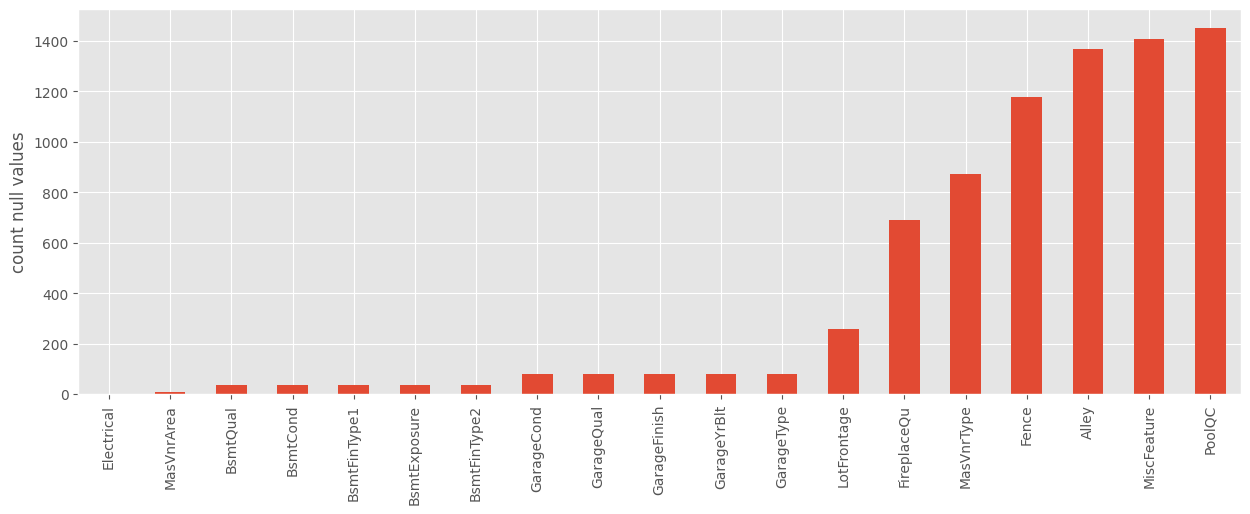

In [19]:
data_set.isna().sum()[data_set.isna().sum()>0].sort_values().plot(kind='bar', ylabel='count null values', figsize=(15,5))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


<Axes: ylabel='percentage null values'>

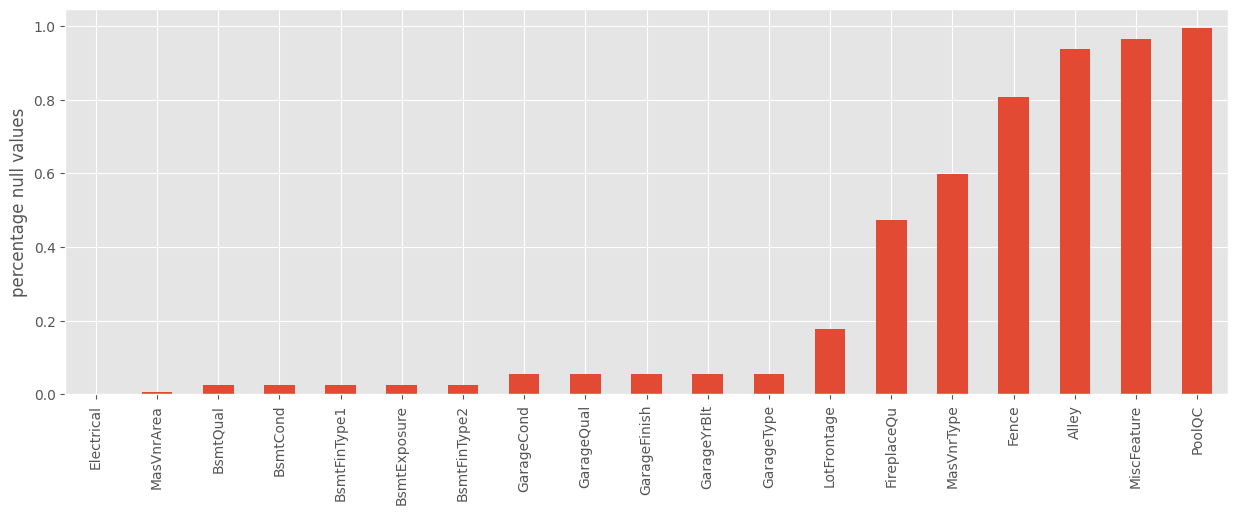

In [20]:
null_Values=data_set.isnull().sum()/len(data_set)
print(null_Values*100)
null_Values[null_Values>0].sort_values().plot(kind='bar', ylabel='percentage null values', figsize=(15,5))

#### **Replaces NA values with more significant labels**

LotFrontage, Alley, MasVnrType, MasVnrArea, BmstQual, BsmtCond, BsmtExposure, BmstFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature are the attributes that contain NA or NA needs to be replaced with another label.

In [21]:
data_set['Alley'].fillna('NO_ACCESS', inplace=True)
data_set['MasVnrType'].fillna('NO_COATING', inplace=True)
data_set['BsmtQual'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtCond'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtExposure'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtFinType1'].fillna('NO_BASEMENT', inplace=True)
data_set['BsmtFinType2'].fillna('NO_BASEMENT', inplace=True)
data_set['FireplaceQu'].fillna('NO_FIREPLACE', inplace=True)
data_set['GarageType'].fillna('NO_GARAGE', inplace=True)
data_set['GarageFinish'].fillna('NO_GARAGE', inplace=True)
data_set['GarageQual'].fillna('NO_GARAGE', inplace=True)
data_set['GarageCond'].fillna('NO_GARAGE', inplace=True)
data_set['PoolQC'].fillna('NO_POOL', inplace=True)
data_set['Fence'].fillna('NO_FENCE', inplace=True)
data_set['MiscFeature'].fillna('None', inplace=True)

Plot null values after substitution

<Axes: ylabel='count null values'>

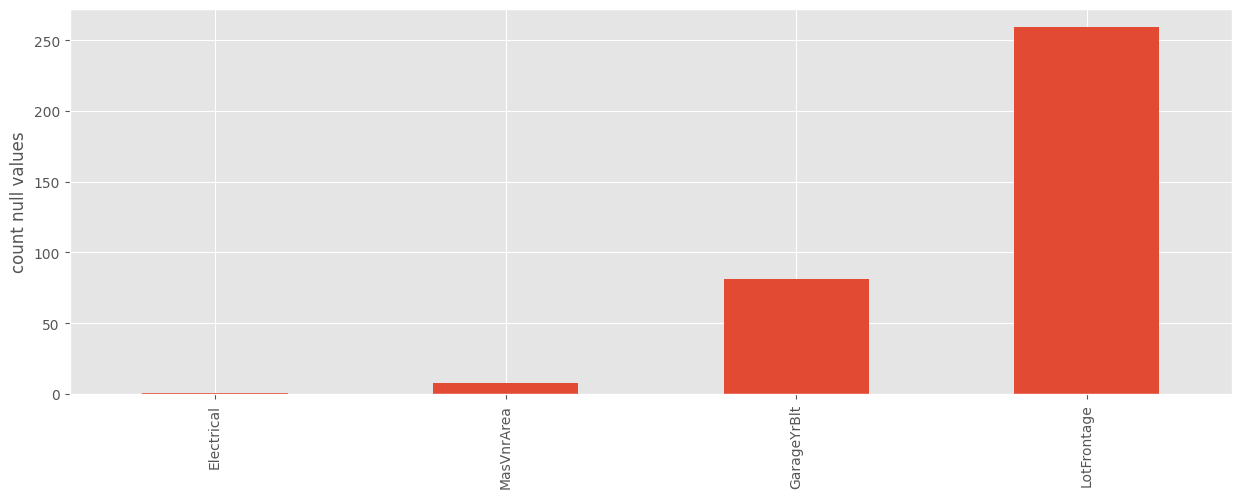

In [22]:
data_set.isna().sum()[data_set.isna().sum()>0].sort_values().plot(kind='bar', ylabel='count null values', figsize=(15,5))

- LotFrontage presenta 259 valori nulli attributo numerico continuo.
- MasVnrArea presenta 8 valori nulli, attributo numerico continuo
- Electrical presenta 1 valore nullo, potremmo rimuovere il record
- GarageYrBlt 81 valori nulli

In [23]:
data_set['LotFrontage'].fillna(0.0, inplace=True)

data_set['MasVnrArea'].fillna(0.0, inplace=True) #0 metri quadrati di rivestimento

#rimuovo l'unico record che contiene il valore nullo
data_set['Electrical'].dropna(inplace=True) 

data_set['GarageYrBlt'].fillna(0, inplace=True)

#### **Convert wrong attribute types**

- YrSold
- MoSold
- MSSubClass

are categorical attributes

In [24]:
wrong_attr = ["YrSold", "MoSold", "MSSubClass"]

for attribute in data_set.columns:
    if data_set[attribute].dtype == object or attribute in wrong_attr:
        data_set[attribute] = data_set[attribute].astype('category')
        
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

#### **Change the target value into ranges**

In [25]:
bins = [0, 150000, 300000, 1000000]
labels = ['LOW', 'MEDIUM', 'HIGH']
data_set['Target'] = pd.cut(data_set['SalePrice'], bins=bins, labels=labels)
data_set['Target'].astype('category')

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: Target, Length: 1460, dtype: category
Categories (3, object): ['LOW' < 'MEDIUM' < 'HIGH']

#### **General statistics on attributes**

In [26]:
data_set.describe().T

count           mean           std      min        25%   
Id             1460.0     730.500000    421.610009      1.0     365.75  \
LotFrontage    1460.0      57.623288     34.664304      0.0      42.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
LotFrontage        63.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     164.25    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1977.0    2001.00    2010.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00 

In [27]:
data_set.describe(include='category').T

count unique           top  freq
MSSubClass     1460     15            20   536
MSZoning       1460      5            RL  1151
Street         1460      2          Pave  1454
Alley          1460      3     NO_ACCESS  1369
LotShape       1460      4           Reg   925
LandContour    1460      4           Lvl  1311
Utilities      1460      2        AllPub  1459
LotConfig      1460      5        Inside  1052
LandSlope      1460      3           Gtl  1382
Neighborhood   1460     25         NAmes   225
Condition1     1460      9          Norm  1260
Condition2     1460      8          Norm  1445
BldgType       1460      5          1Fam  1220
HouseStyle     1460      8        1Story   726
RoofStyle      1460      6         Gable  1141
RoofMatl       1460      8       CompShg  1434
Exterior1st    1460     15       VinylSd   515
Exterior2nd    1460     16       VinylSd   504
MasVnrType     1460      4    NO_COATING   872
ExterQual      1460      4            TA   906
ExterCond      1460      5            TA  1282
Foundation     1460      6         PConc   647
BsmtQual       1460      5            TA   649
BsmtCond       1460      5            TA  1311
BsmtExposure   1460      5            No   953
BsmtFinType1   1460      7           Unf   430
BsmtFinType2   1460      7           Unf  1256
Heating        1460      6          GasA  1428
HeatingQC      1460      5            Ex   741
CentralAir     1460      2             Y  1365
Electrical     1459      5         SBrkr  1334
KitchenQual    1460      4            TA   735
Functional     1460      7           Typ  1360
FireplaceQu    1460      6  NO_FIREPLACE   690
GarageType     1460      7        Attchd   870
GarageFinish   1460      4           Unf   605
GarageQual     1460      6            TA  1311
GarageCond     1460      6            TA  1326
PavedDrive     1460      3             Y  1340
PoolQC         1460      4       NO_POOL  1453
Fence          1460      5      NO_FENCE  1179
MiscFeature    1460      5          None  1406
MoSold         1460     12             6   253
YrSold         1460      5          2009   338
SaleType       1460      9            WD  1267
SaleCondition  1460      6        Normal  1198
Target         1460      3        MEDIUM   726

#### **Building plots**

##### Target value distribution plot

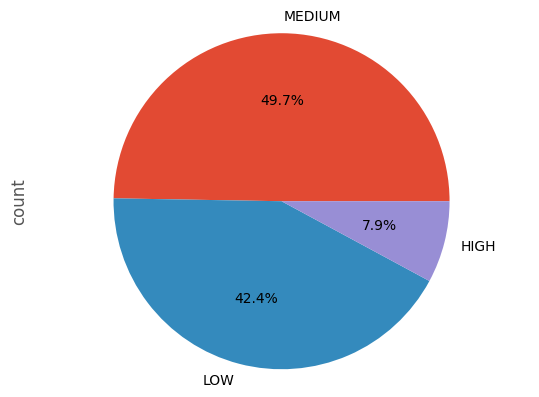

In [28]:
data_set['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # This ensures that the pie is drawn as a circle
plt.show()

##### Numerical attributes plot

**Numerical Attributes** are:
Id, LotFrontage, LotArea, ~~YearBuilt~~, ~~YearRemodAdd~~, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice	

*id* is a number to identify each record and it is an incremental counter.  
So we want to plot only the other numerical attributes:

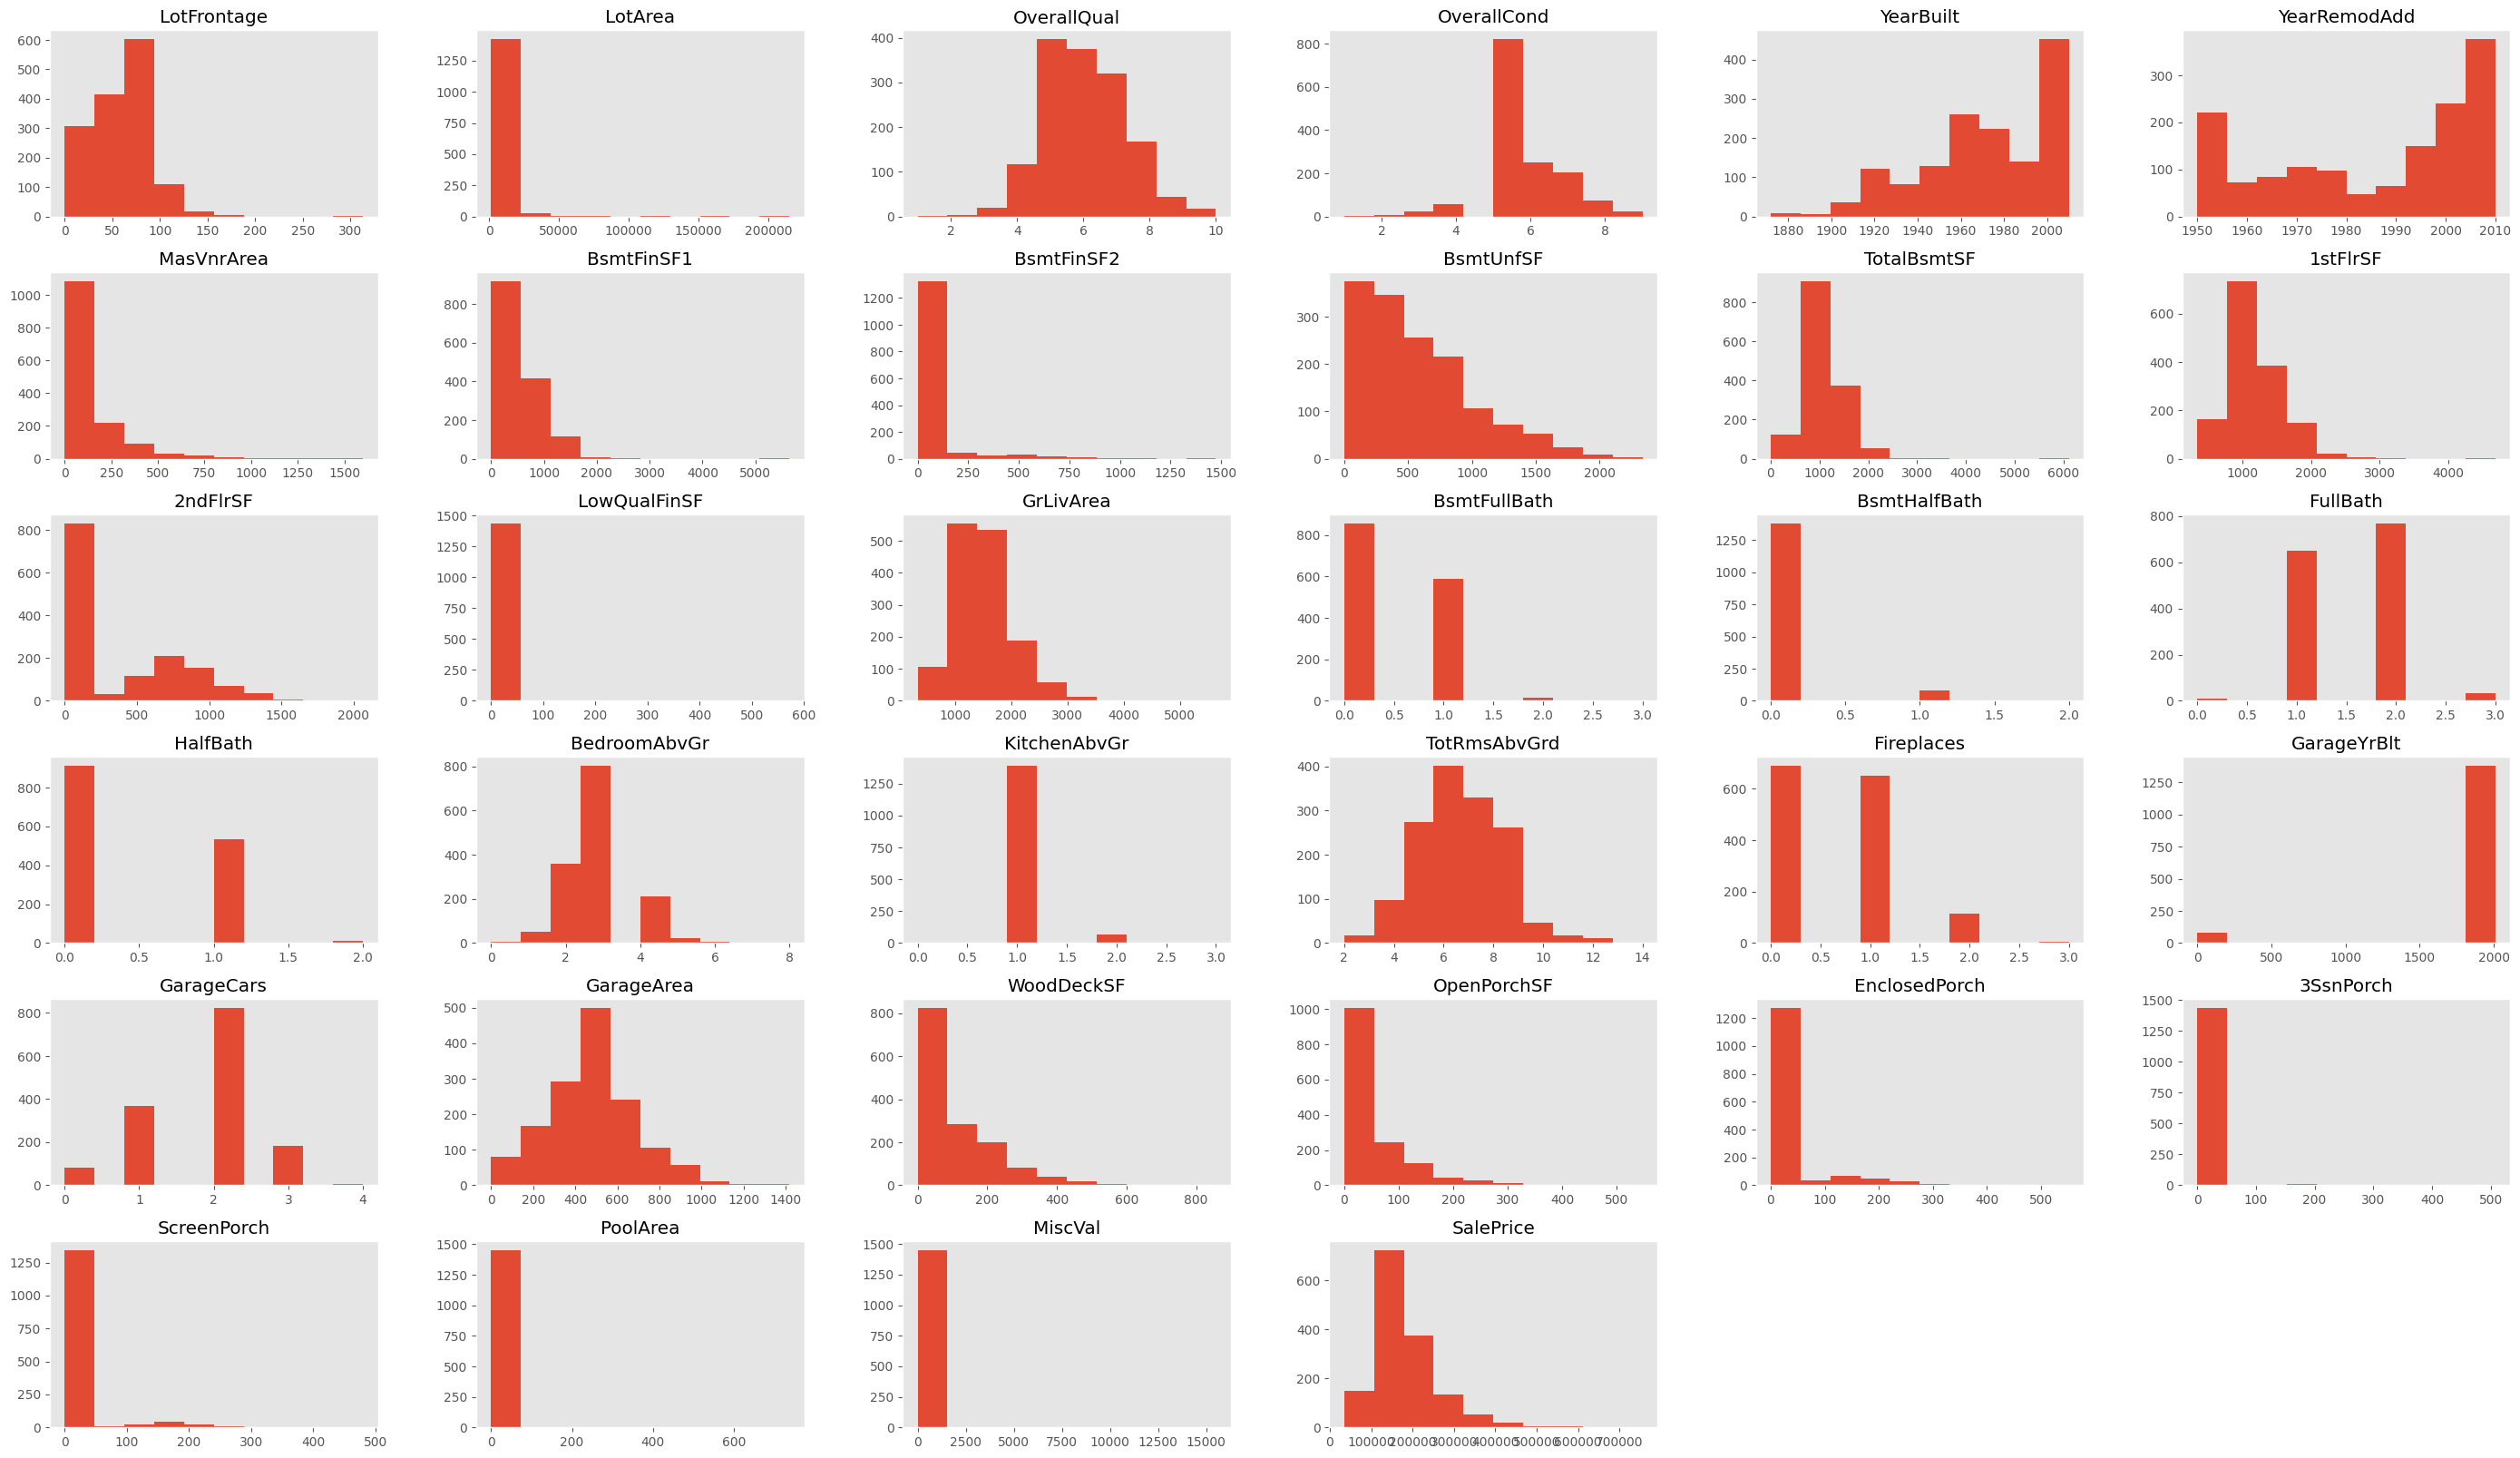

In [29]:
numerical_attributes = []
remove = ['MoSold', 'YrSold', 'Id']

for attribute in data_set.columns:
    if data_set[attribute].dtype != 'category' and not attribute in remove:
        numerical_attributes.append(attribute)
        
numericDF = data_set[numerical_attributes]
numericDF.hist(figsize=(35,20), grid=False)

plt.show()

##### Categorical attributes plot

By analyzing the result of the function `describe()` there are some attributes that don't provide any information to the analysis, such as *Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, MasVnrType, ExterCond, BsmtCond, BsmtFinType2, Heating, Electrical, Functional, GarageQual, GarageCond, PavedDrive, PoolQC, MiscFeature, SaleType, SaleCondition*. \
So we want to plot only the other categorical attributes:

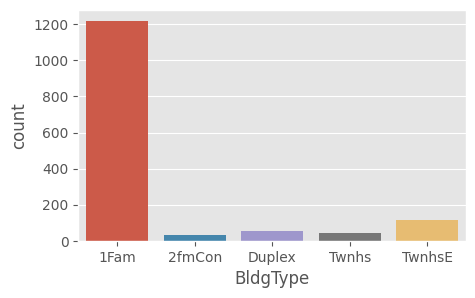

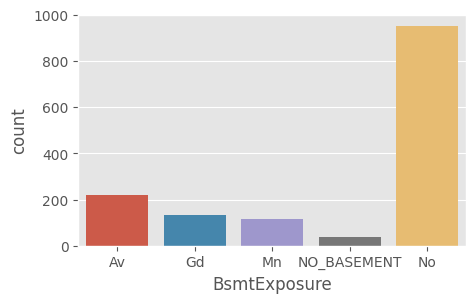

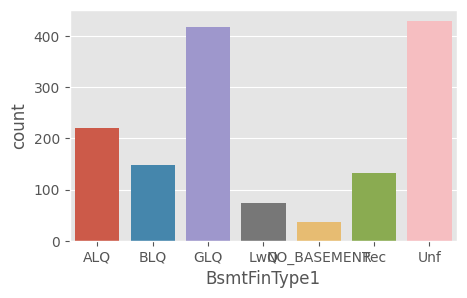

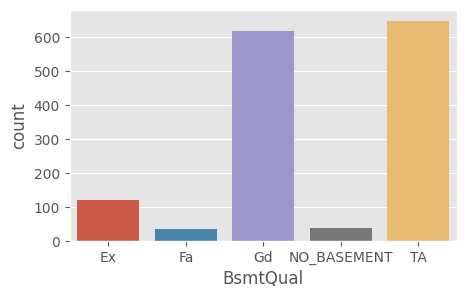

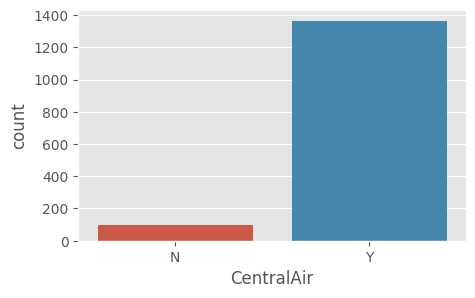

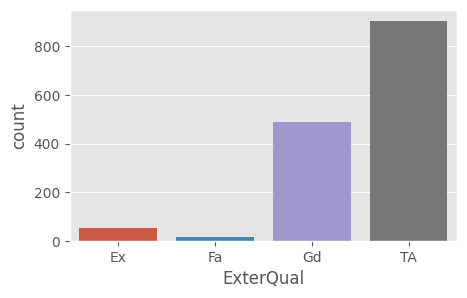

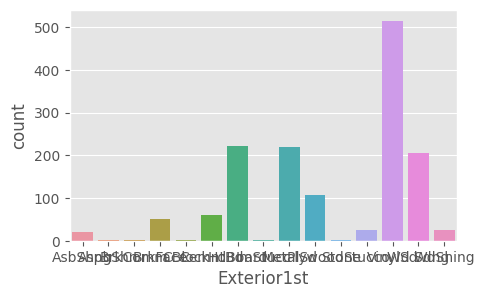

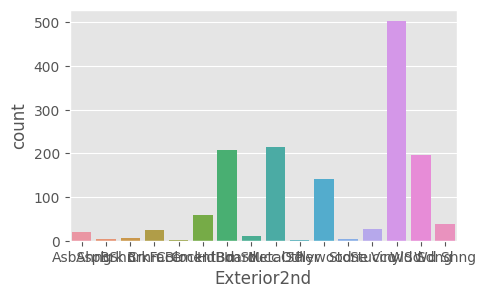

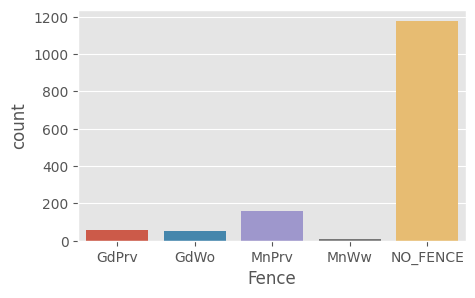

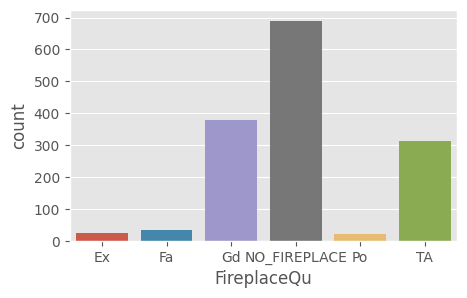

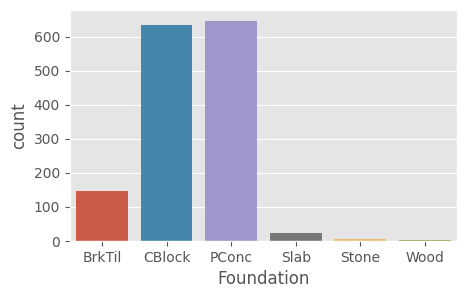

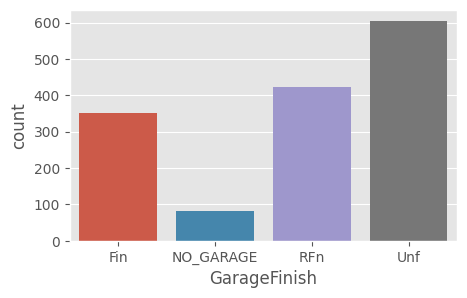

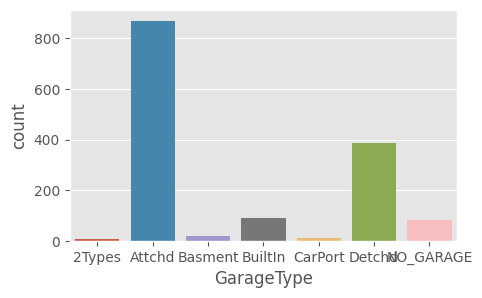

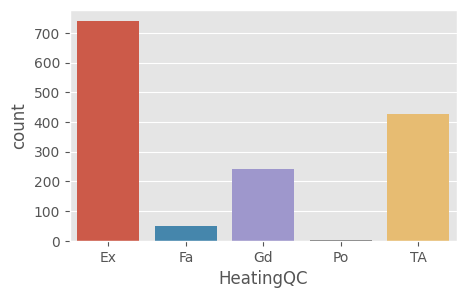

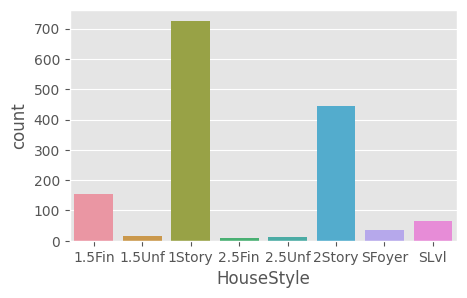

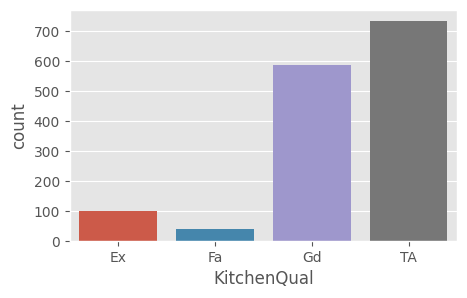

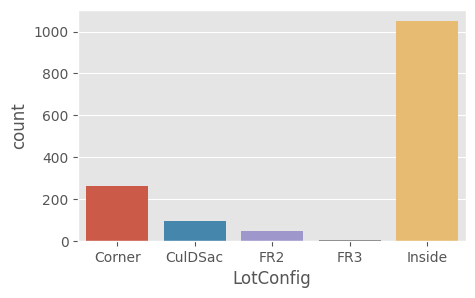

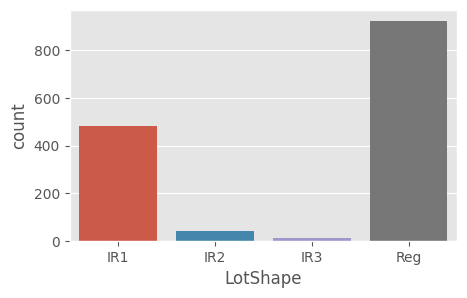

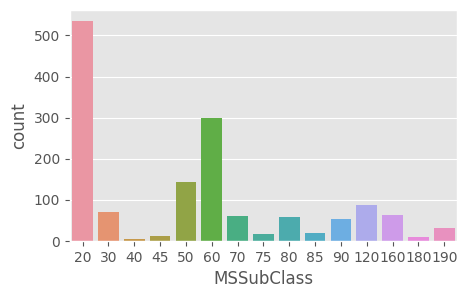

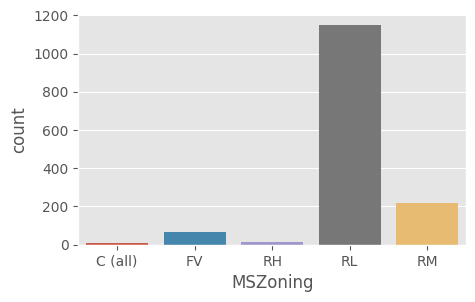

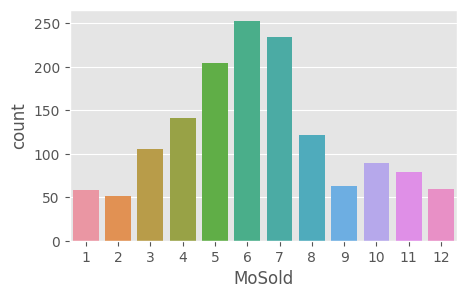

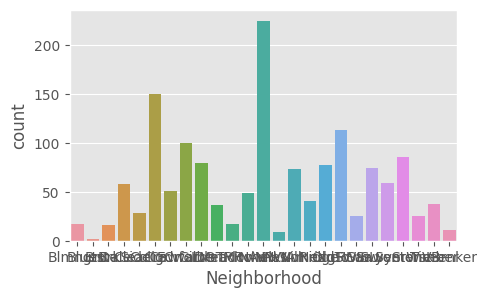

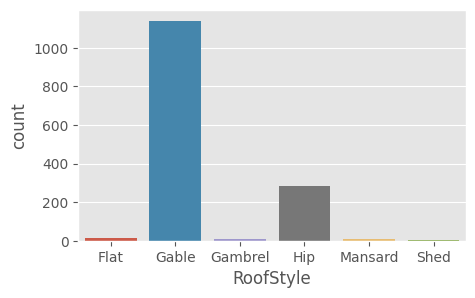

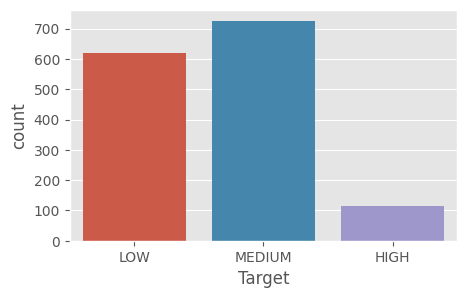

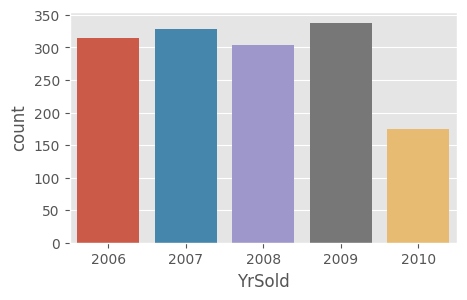

In [30]:
remove = ['Id', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

categorical_attributes = data_set.columns.difference(numerical_attributes)
categoricDF = data_set[categorical_attributes]
categoricDF = categoricDF[categoricDF.columns.difference(remove)]

for attribute in categoricDF.columns:
    plt.figure(figsize=(5,3))
    sb.countplot(data = data_set, x = attribute)
    plt.show()

#### **Histograms and bar plots according to class attributes**

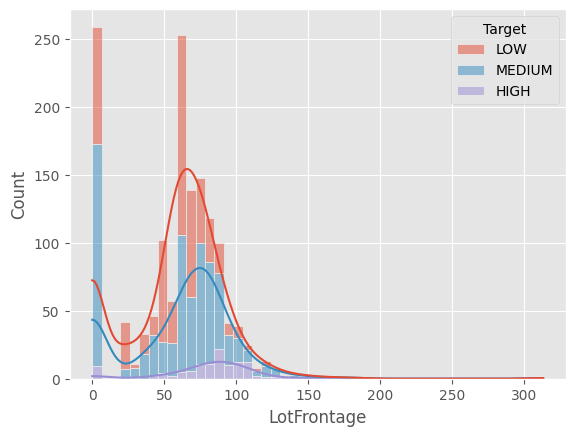

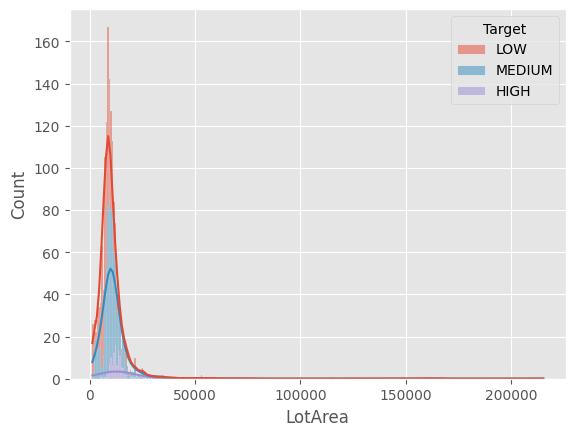

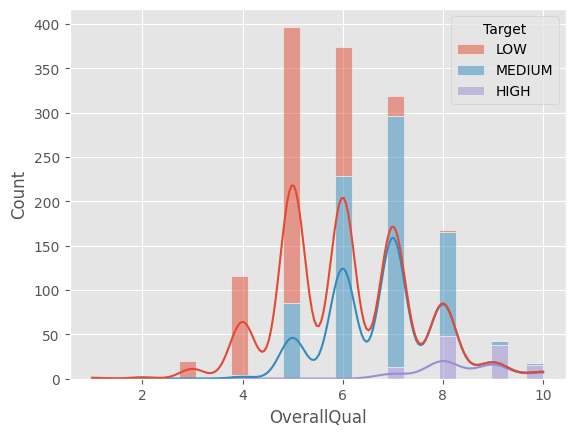

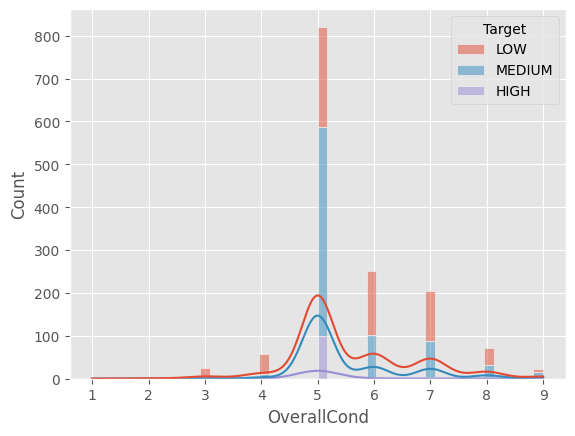

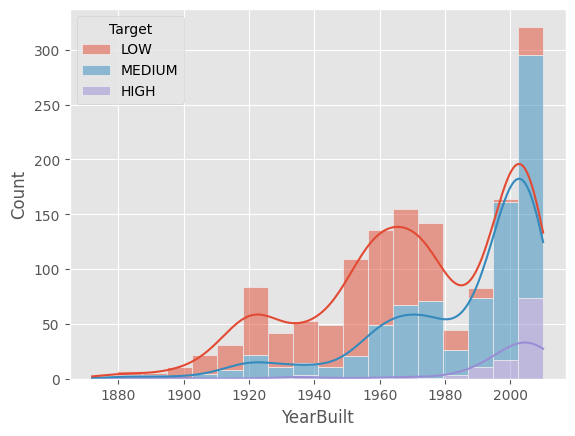

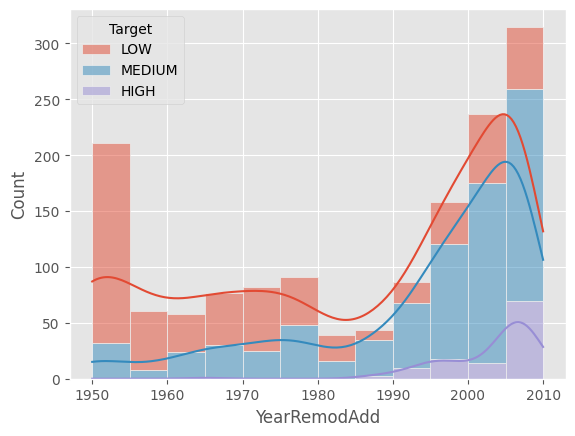

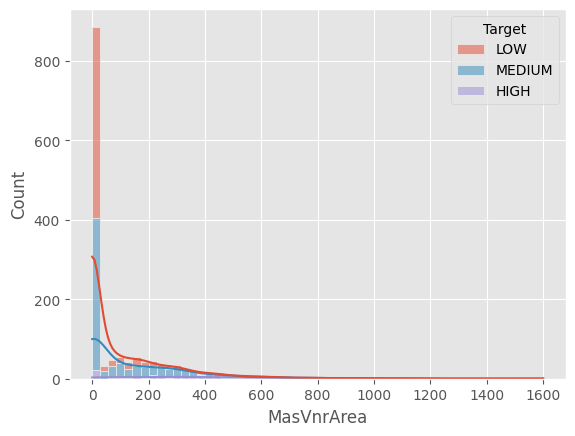

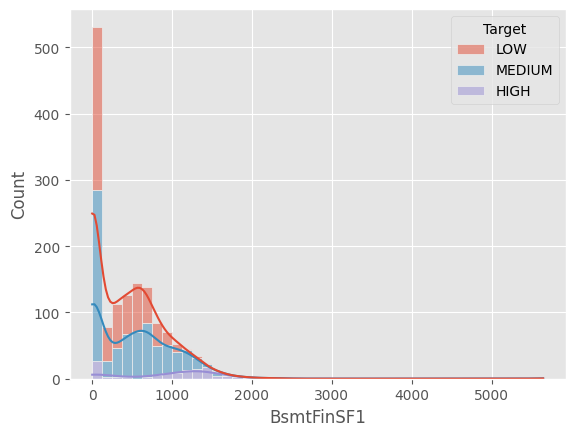

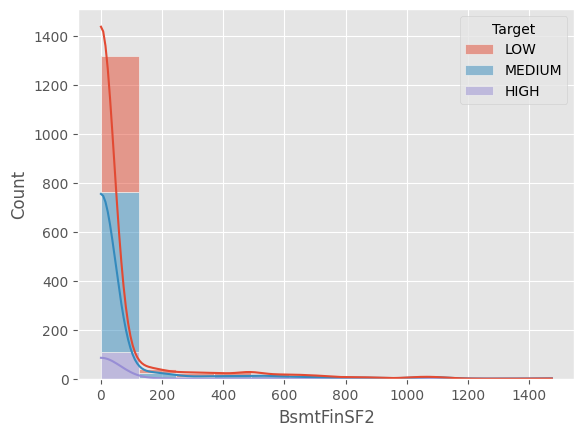

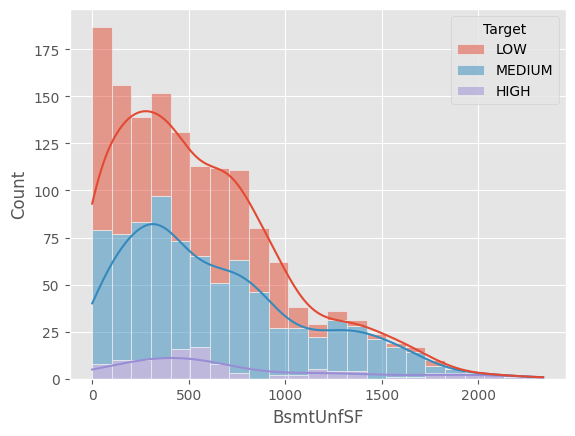

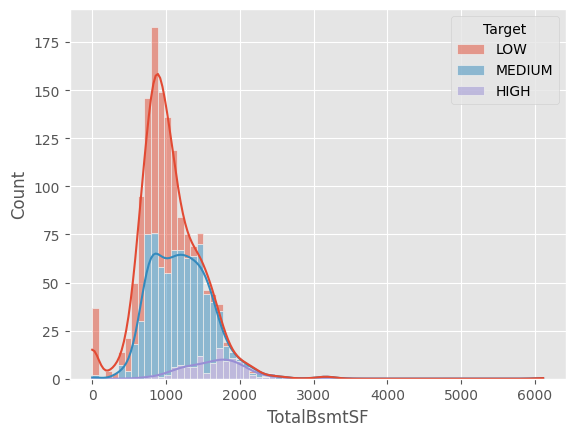

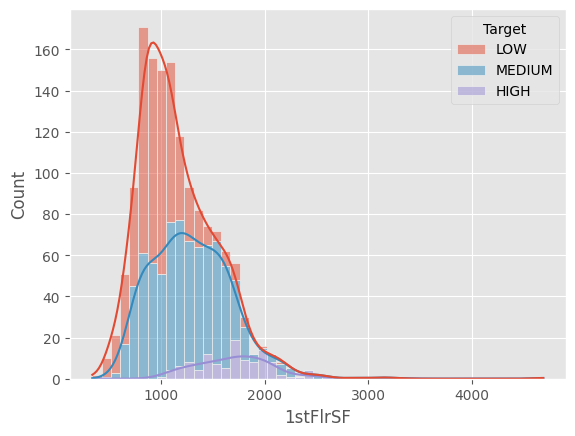

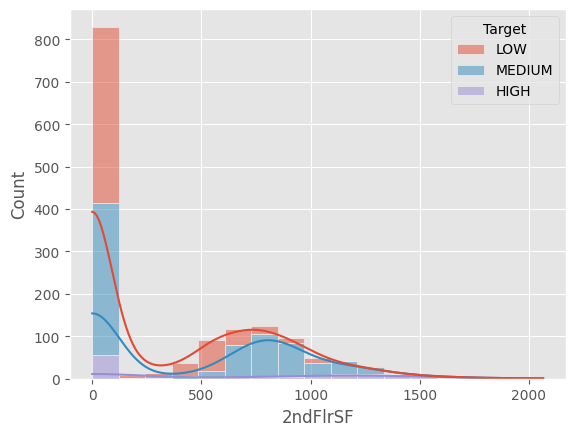

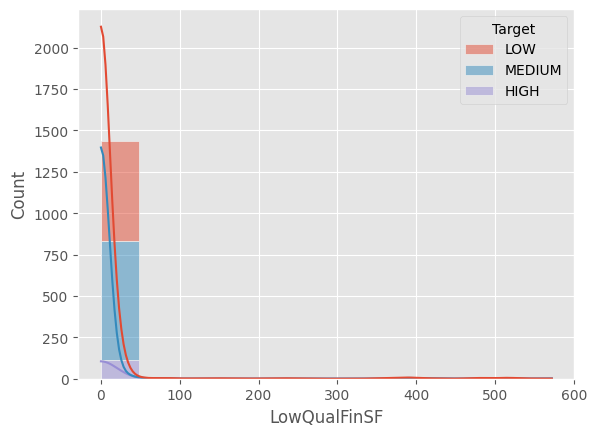

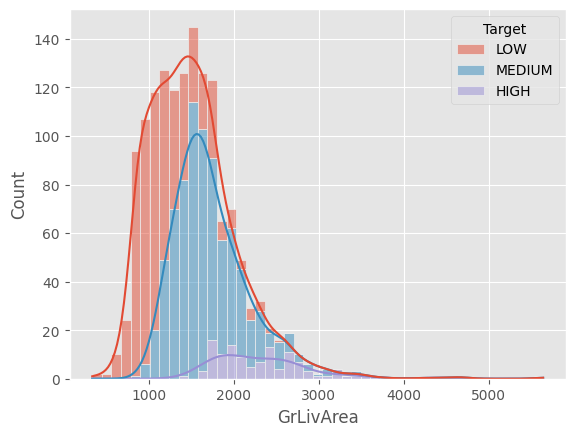

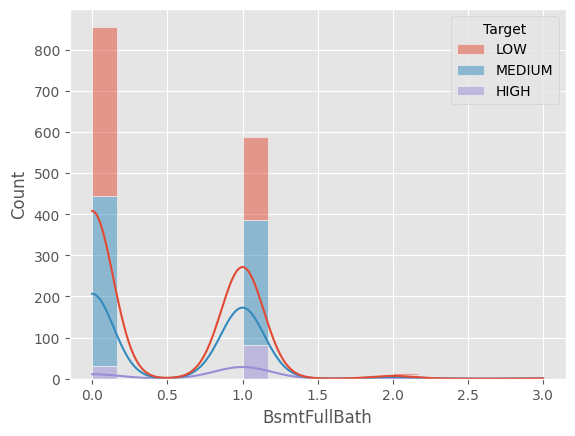

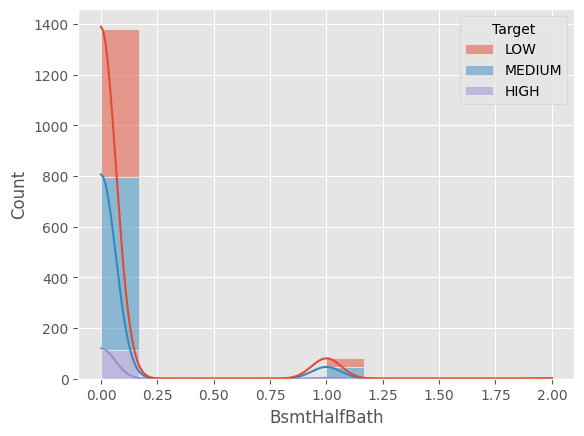

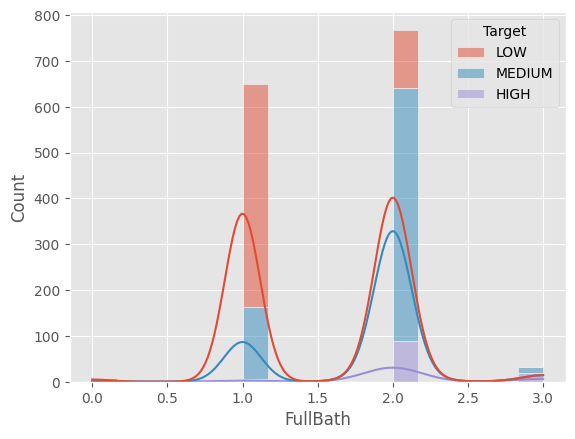

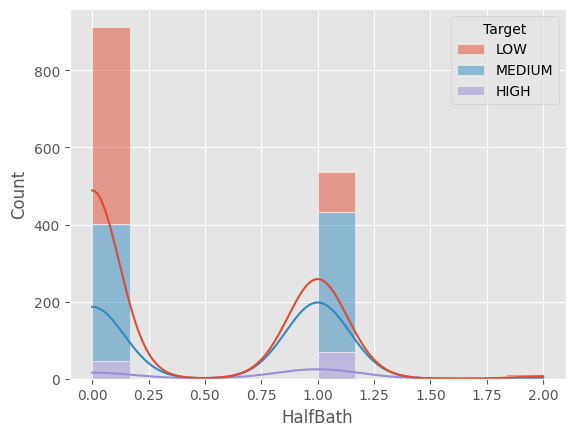

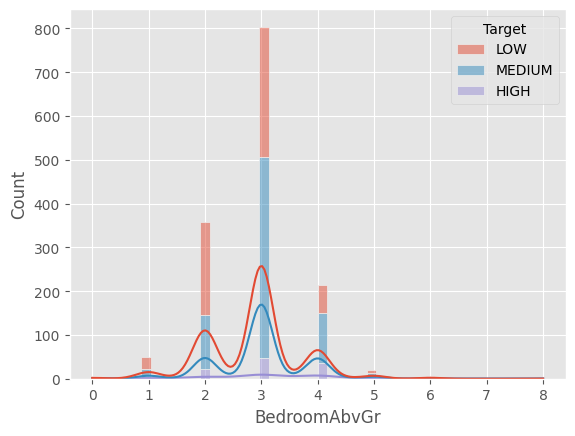

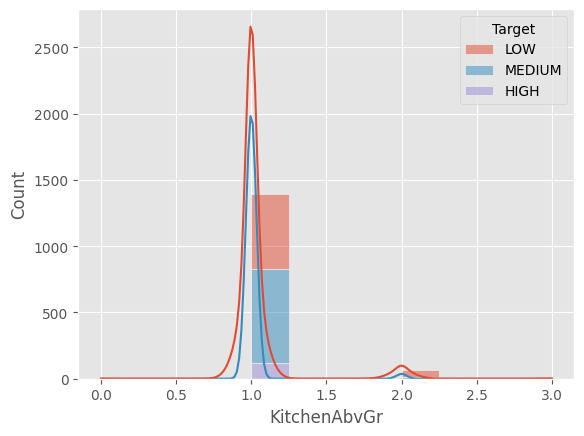

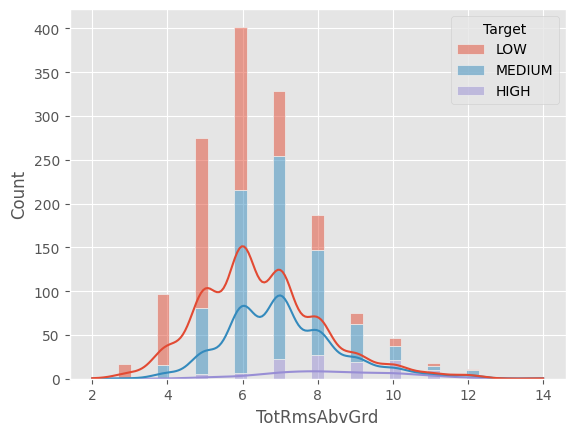

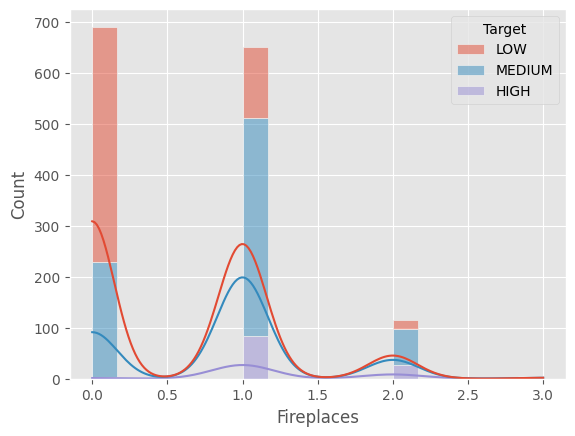

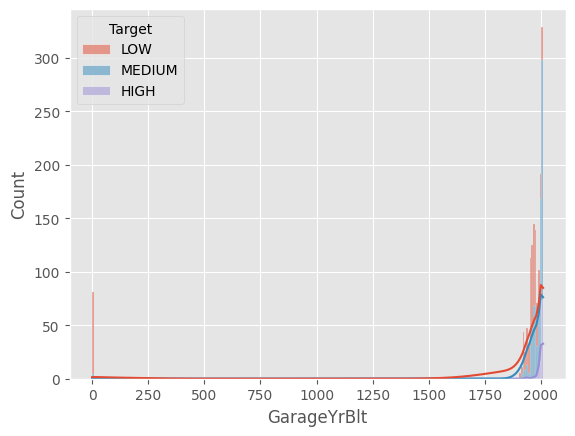

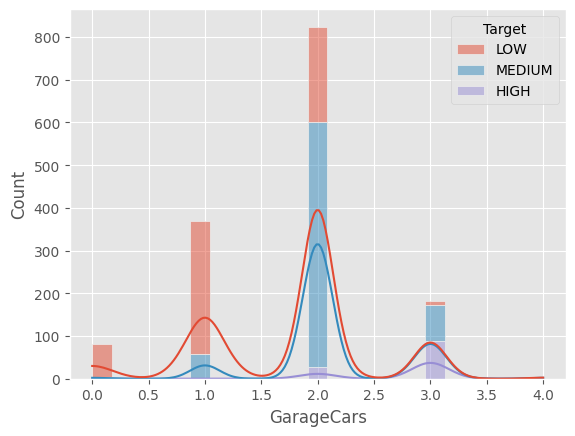

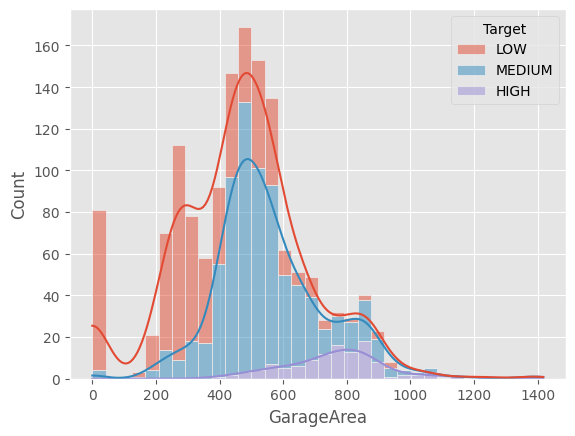

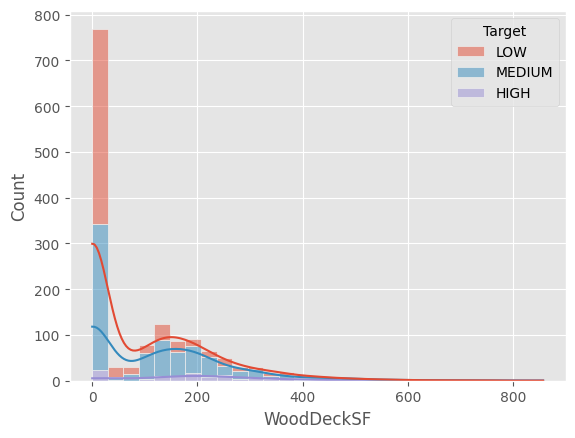

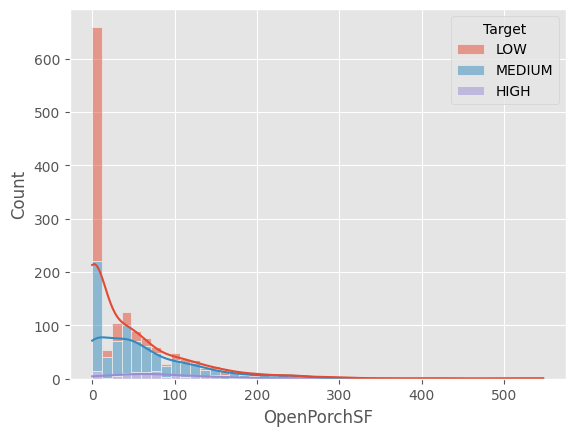

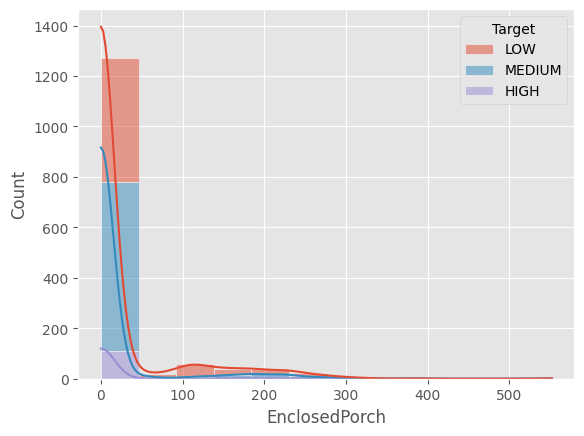

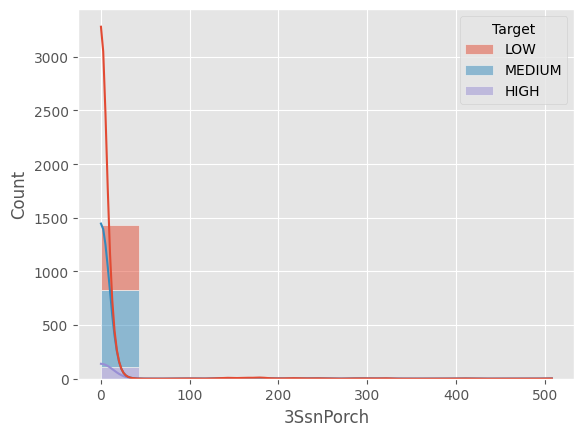

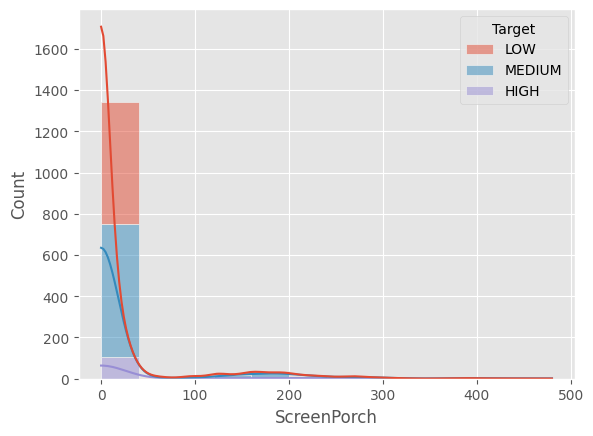

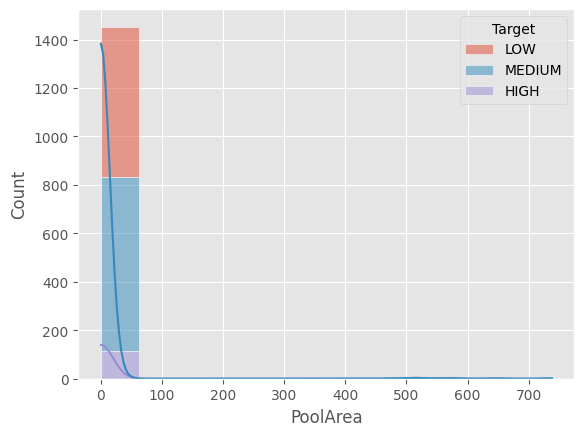

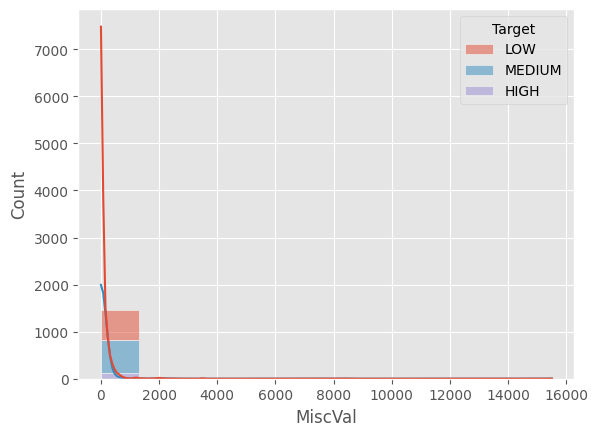

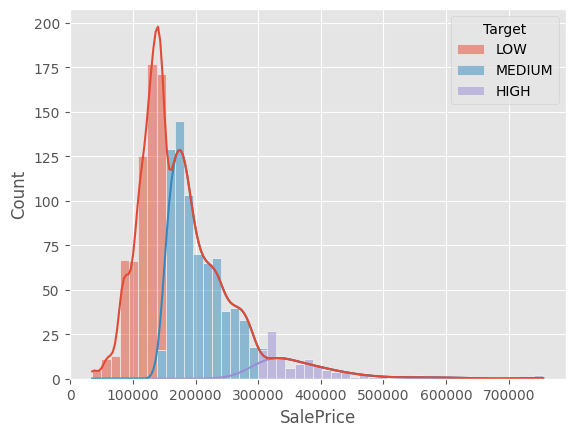

In [31]:
for attr in numericDF:
    sb.histplot(x=numericDF[attr], hue='Target', data=data_set, multiple='stack', kde=True)
    plt.show()

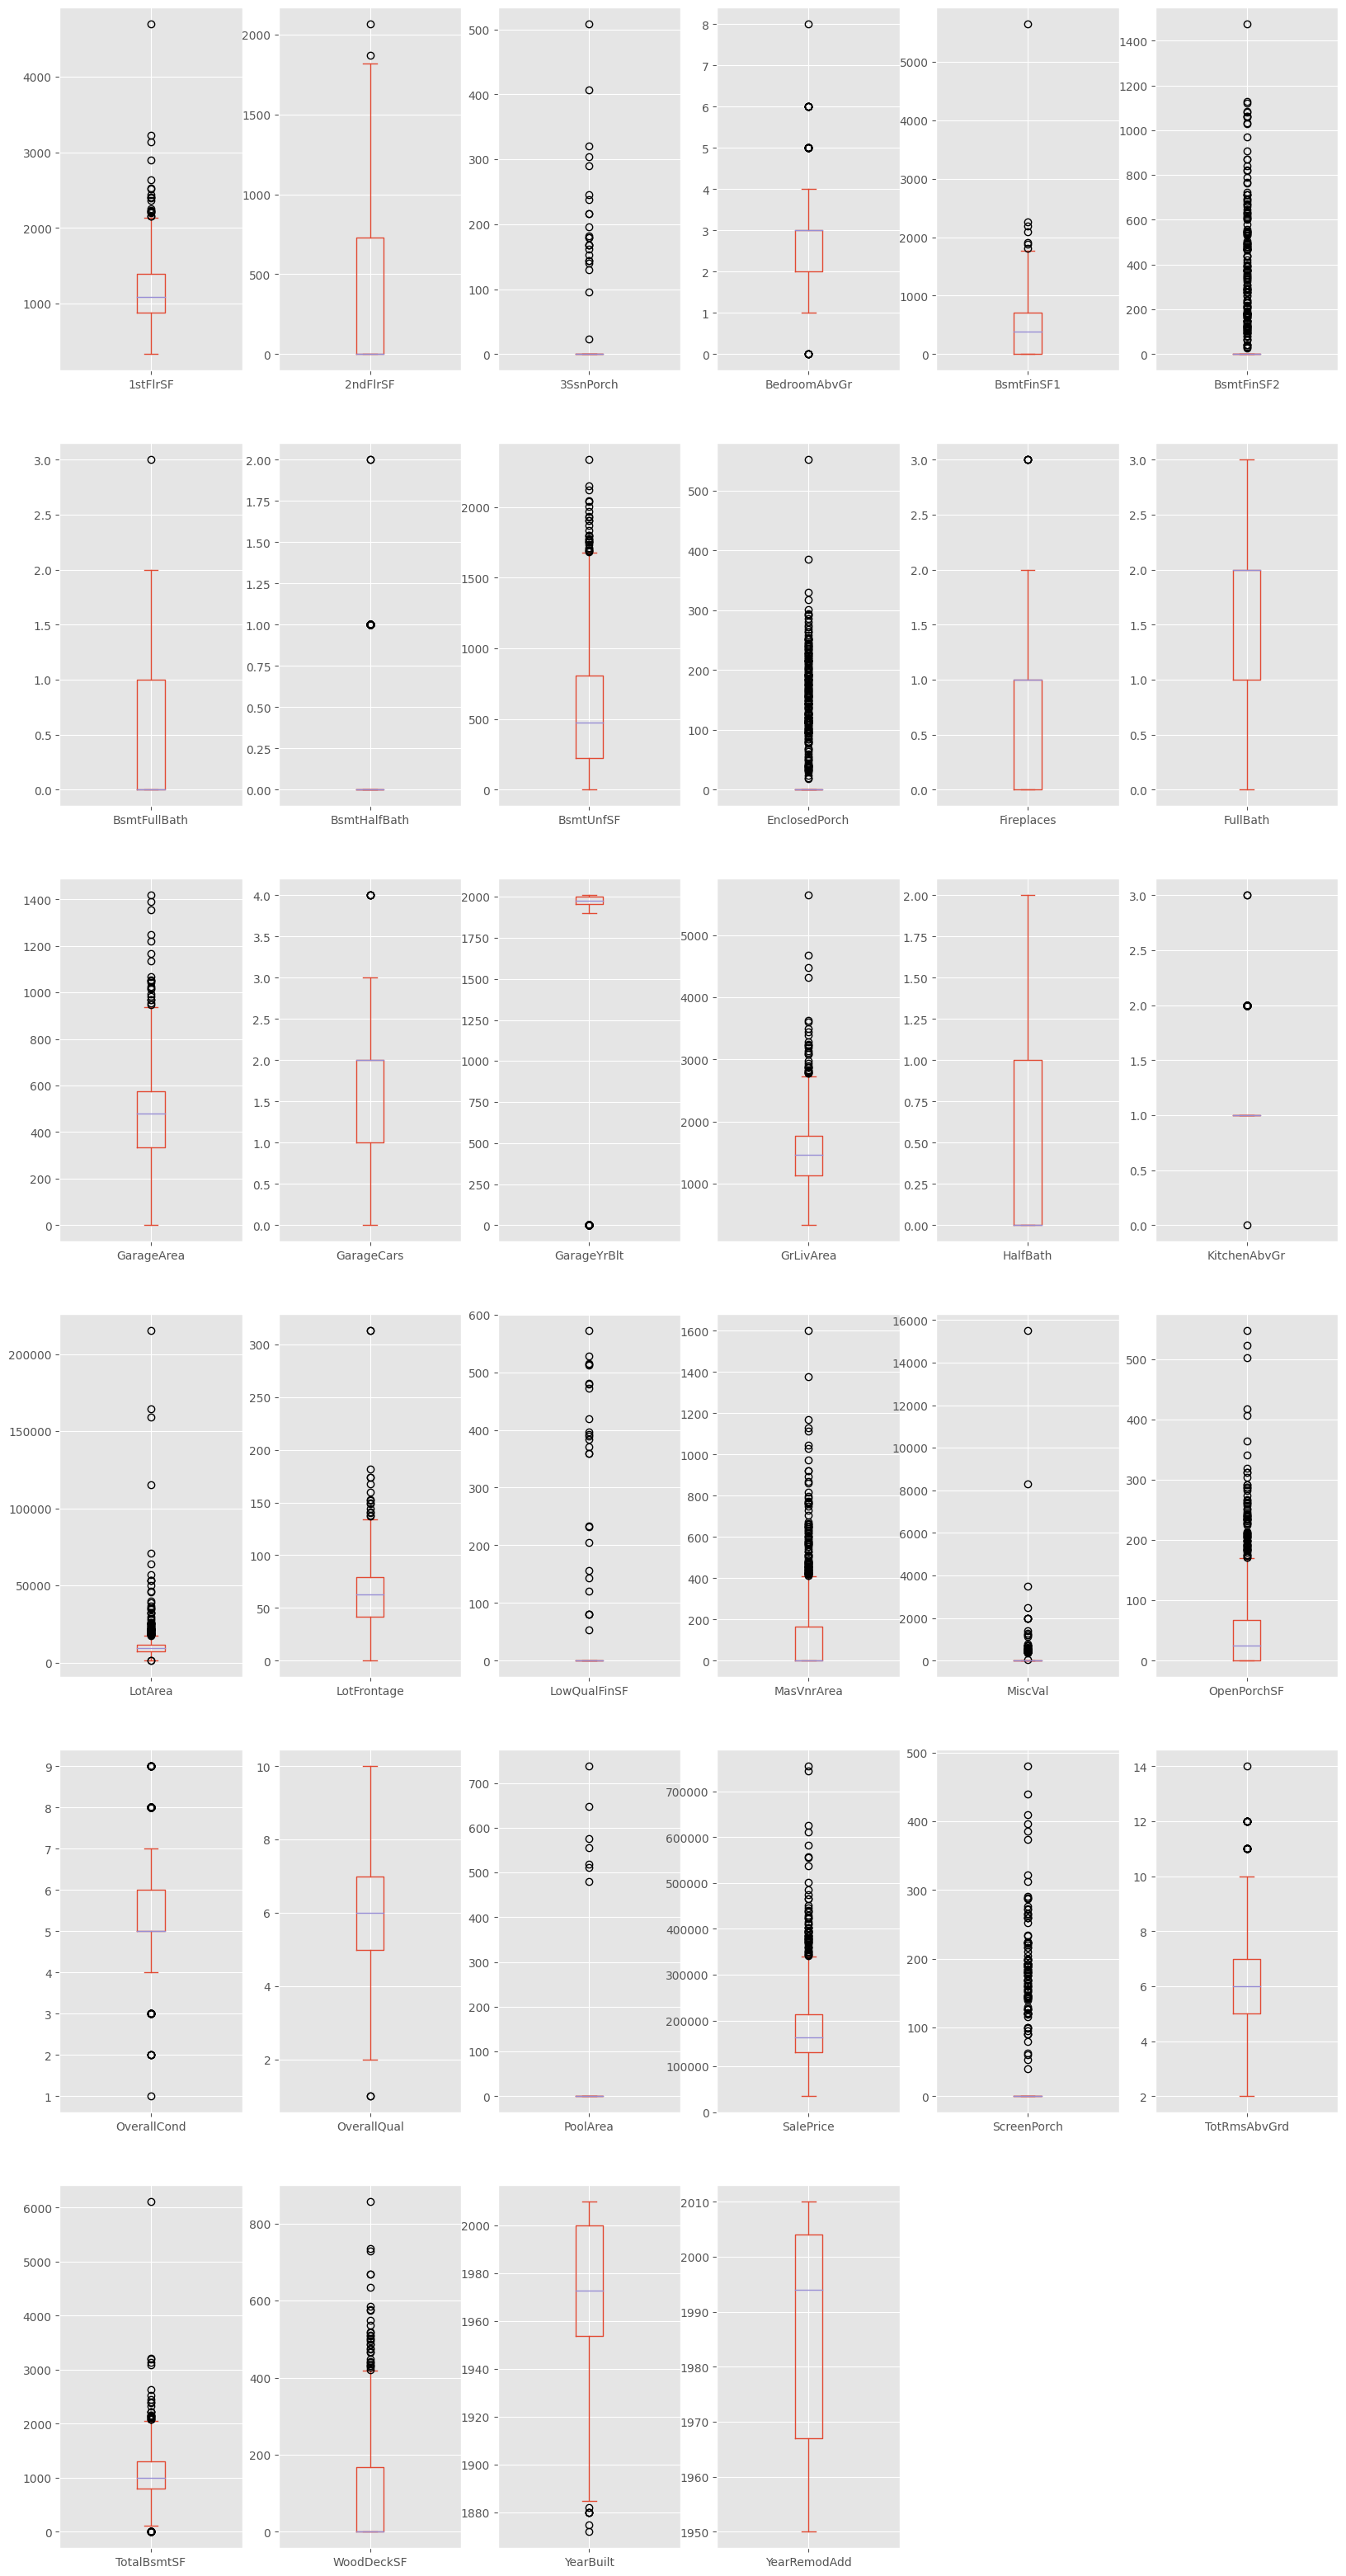

In [32]:
numericDF = data_set[data_set.columns.difference(categorical_attributes)]
numericDF.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 40), layout=(6, 6))
plt.show()

##### Heat map for numerical attributes

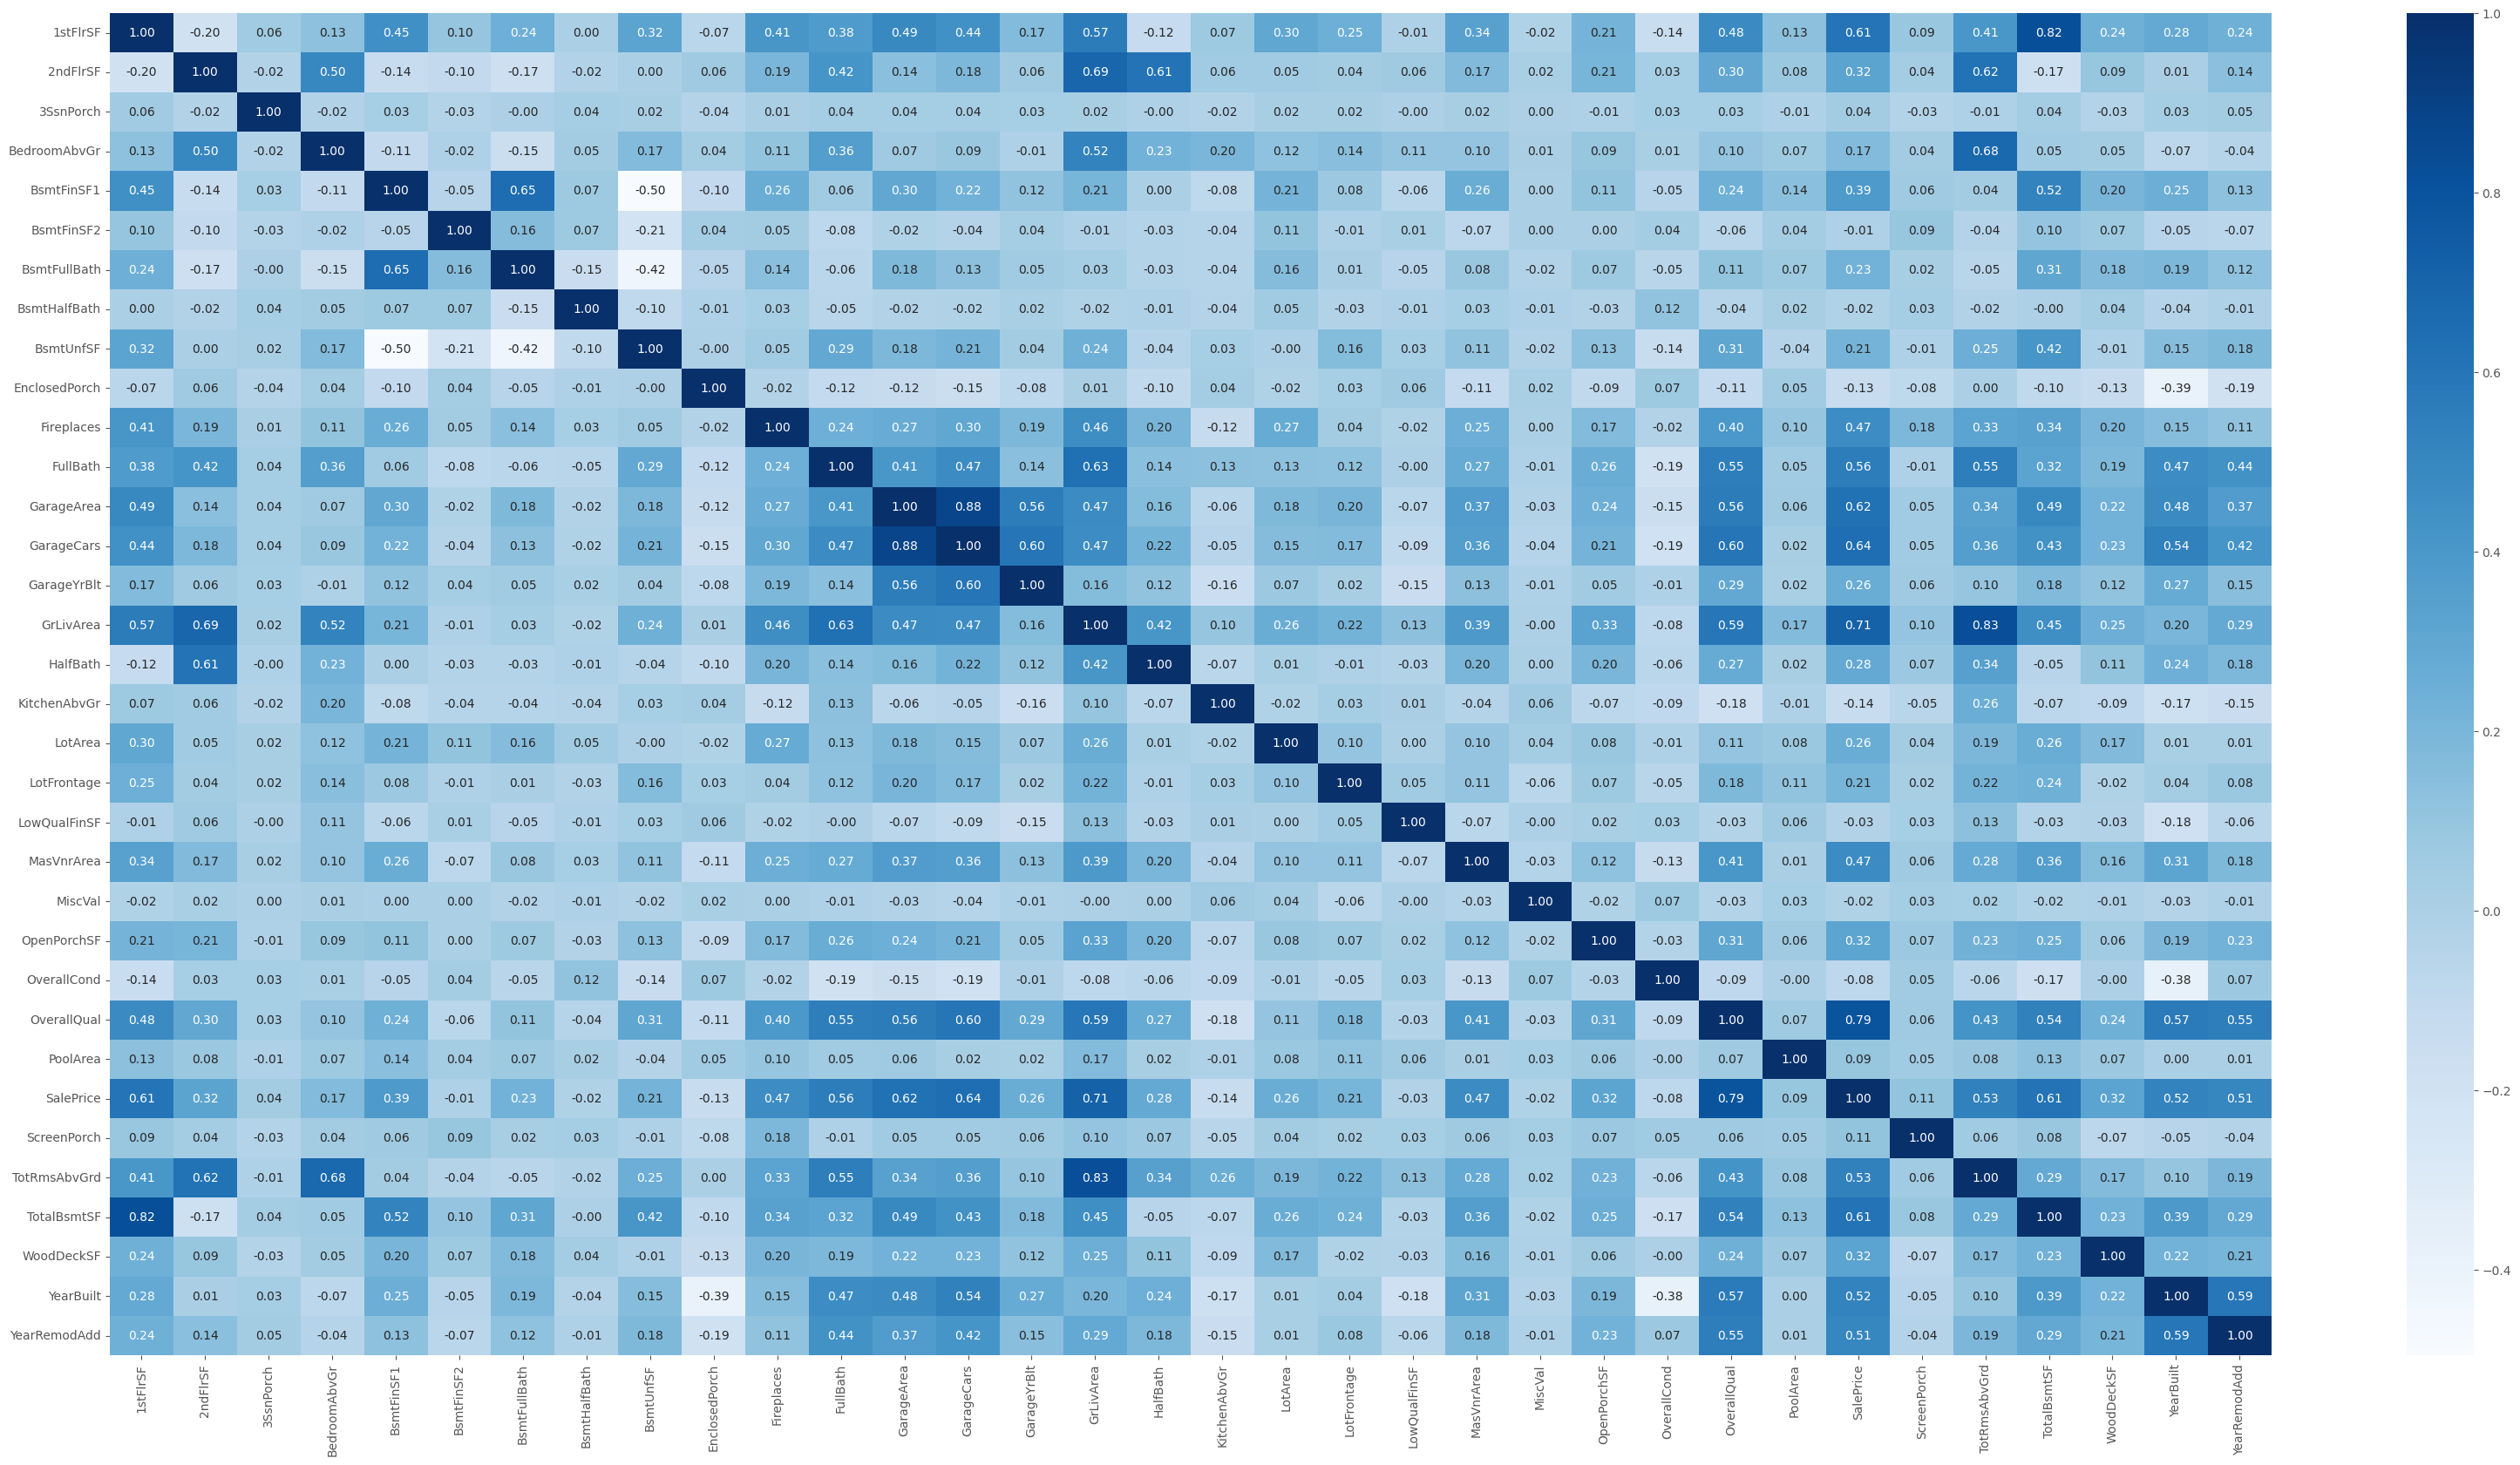

In [33]:
plt.figure(figsize=(40, 20))
sb.heatmap(numericDF.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

Ci sono delle correlazione abbastanza marcate tra :
 - GarageCars - GarageArea  oviamente più è grande il garage più macchine ci entrano (potremmo rimuovere GarageCars)
 - TotRmsAbvGrd - GrLivArea più è grande il piano più stanze ci sono (potremmo rimuovere TotRmsAbvGrd)
 - SalesPrice - OverallQual nella maggior parte dei casi il prezzo è proporzionale alla qualità generale della casa
 - SalesPrice - GrLivArea più è grande la casa più costa
 - YrBuilt - GarageYrBlt molti garage sono stati costruiti nello stesso anno di costruzione della casa.
 - TotalBsmtSF - 1stFirSF le fondamenta di molte case hanno la stessa area del primo piano. (potremmo rimuovere uno dei due)

Rimuovo gli attributi che presentano correlazioni marcate

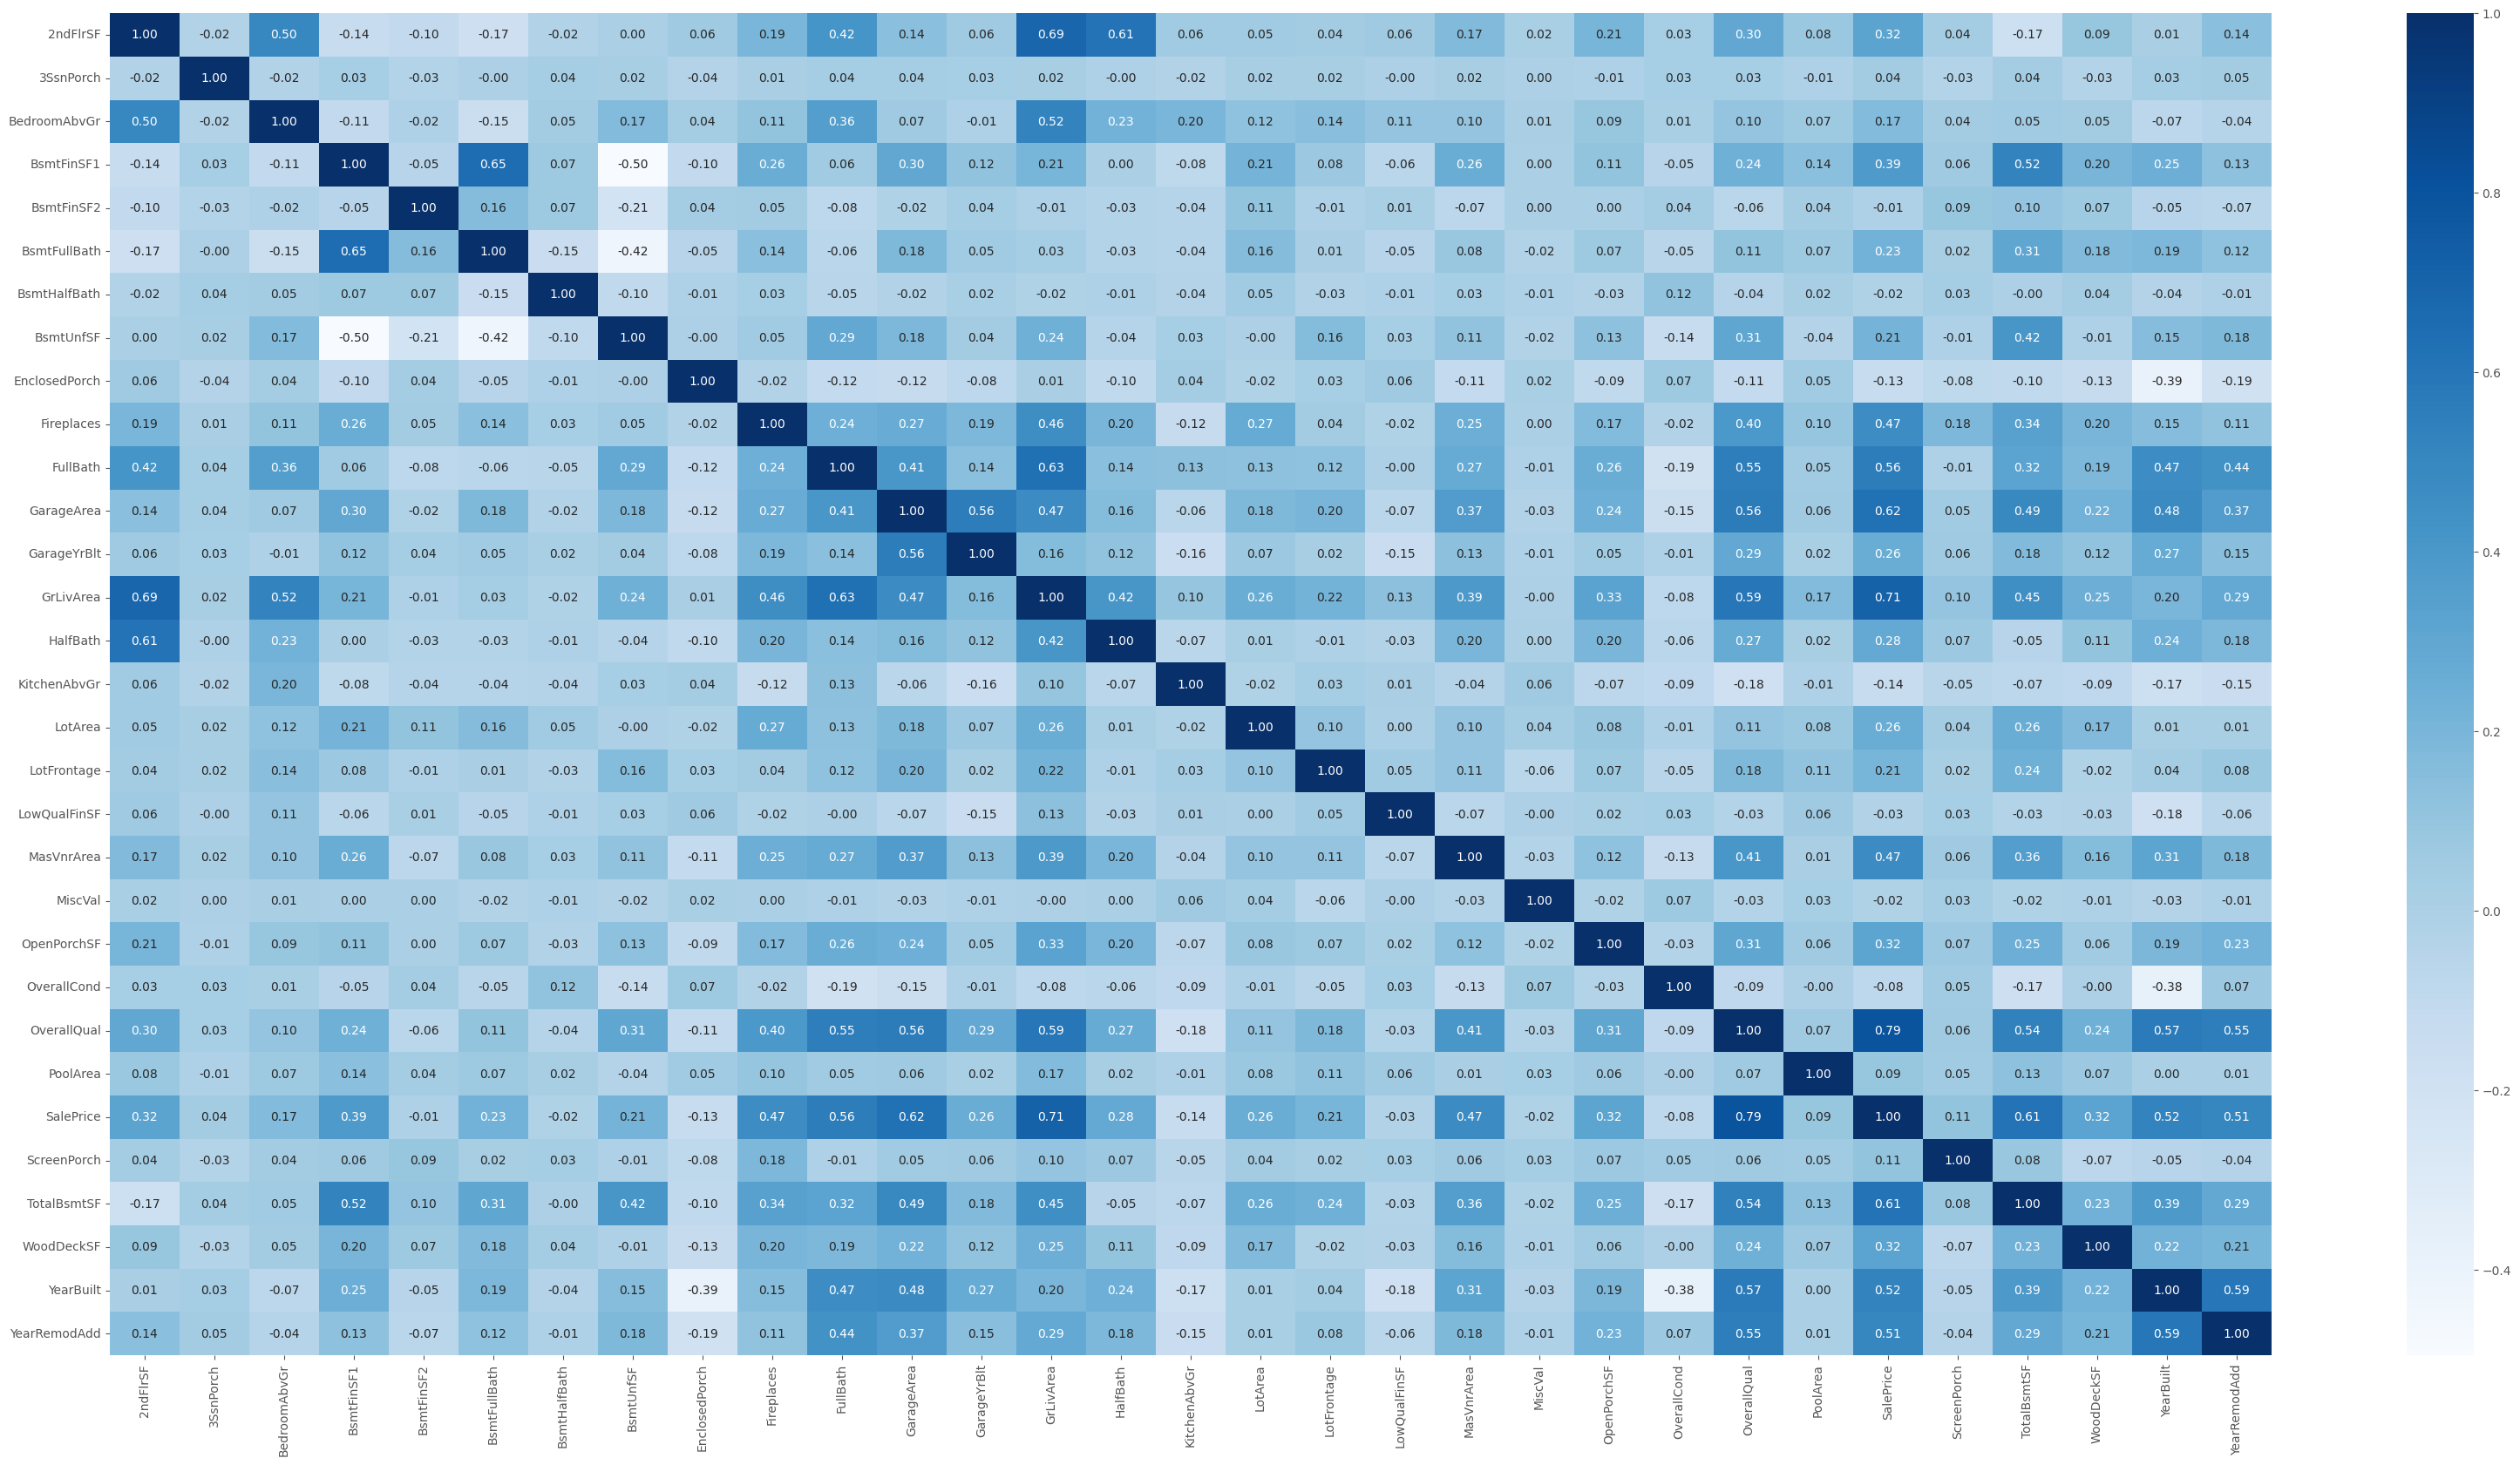

In [34]:
numerical_data_set = numericDF[numericDF.columns.difference(['GarageCars','TotRmsAbvGrd','1stFlrSF'])]
plt.figure(figsize=(40, 20))
sb.heatmap(numerical_data_set.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

### **Data Preparation**

Drop the *Id* column as it represents a simple record identifier

In [35]:
data_set.drop('Id', axis=1, inplace=True)

#### Discretization of *GarageYrBlt*

In [36]:
data_set['GarageYrBlt'] = data_set['GarageYrBlt'].astype('int64')
data_set['GarageYrBlt'] = pd.cut(data_set['GarageYrBlt'], bins=[-1, 1, 1900, 1920, 1940, 1960, 1980, 2000, 2010, 2030], labels=['NoGarage','1900','1920','1940','1960','1980','2000','2010','2020'])
data_set['GarageYrBlt'].unique()

['2010', '1980', '2000', '1940', '1960', '1920', 'NoGarage', '1900']
Categories (9, object): ['NoGarage' < '1900' < '1920' < '1940' ... '1980' < '2000' < '2010' < '2020']

#### Binarization of *Fence*

In [37]:
data_set['Fence'] = data_set['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw'], 'Fence')
data_set['Fence'] = data_set['Fence'].fillna('NO_FENCE')

#### Binarization of *Pool*

In [38]:
bins = [0, 500, 1000000]
labels = ['POOL', 'NO_POOL']
data_set['PoolArea'] = pd.cut(data_set['PoolArea'], bins=bins, labels=labels)
data_set['PoolArea'].astype('category')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolArea, Length: 1460, dtype: category
Categories (2, object): ['POOL' < 'NO_POOL']

Binarizzo gli attributi categorici e rimuovo gli attributi Target e SalePrice

In [39]:
cat_attributes = data_set.select_dtypes(include = ['category']).columns.tolist()
cat_attributes.remove('Target')
data_set_2 = pd.get_dummies(data_set, columns = cat_attributes)
data_set_2.drop('Target', axis=1, inplace=True)
data_set_2.drop('SalePrice', axis=1, inplace=True)
data_set_2.drop('GarageCars', axis=1, inplace=True)
data_set_2.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd   
0         65.0     8450            7            5       2003          2003  \
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw   
0       196.0         706           0        150  ...           False  \
1         0.0         978           0        284  ...           False   
2       162.0         486           0        434  ...           False   
3         0.0         216           0        540  ...           False   
4       350.0         655           0        490  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml   
0         False         False         True                  False  \
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                   True   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family   
0                  False                 False                 False  \
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 336 columns]

In [40]:
data_set_2.shape

(1460, 336)

### **Modelling**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [42]:
x = np.array(data_set_2.values)
print(x)
y = np.array(data_set['Target'].values)
print(y)
seed = 101
test_size = .3
validation_size = .2
#x_train, y_train = x, y
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=seed)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = validation_size, random_state=seed)

[[65.0 8450 7 ... False True False]
 [80.0 9600 6 ... False True False]
 [68.0 11250 7 ... False True False]
 ...
 [66.0 9042 7 ... False True False]
 [68.0 9717 5 ... False True False]
 [75.0 9937 5 ... False True False]]
['MEDIUM' 'MEDIUM' 'MEDIUM' ... 'MEDIUM' 'LOW' 'LOW']


### Find the best parameters for the models

In [43]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 50, ), max_iter=200, verbose=True,
                                              random_state=seed)))

models.append(('RandomForestClassifier', RandomForestClassifier(random_state=seed)))
for name, model in models:
    print(name)

    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)

    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))

C45
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.83      0.88      0.86        17
         LOW       0.82      0.85      0.84        87
      MEDIUM       0.85      0.81      0.83       101

    accuracy                           0.83       205
   macro avg       0.83      0.85      0.84       205
weighted avg       0.83      0.83      0.83       205

CART
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.93      0.76      0.84        17
         LOW       0.86      0.85      0.86        87
      MEDIUM       0.84      0.87      0.85       101

    accuracy                           0.85       205
   macro avg       0.88      0.83      0.85       205
weighted avg       0.86      0.85      0.85       205

GaussianNaiveBayes
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.25      0.88      0.39        17
         LOW       0.81   

In [44]:
model = DecisionTreeClassifier(criterion='entropy', random_state=101)
#model = GaussianNB()
#model =  MLPClassifier(hidden_layer_sizes=(50, 50, ), max_iter=200, verbose=True, random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.79


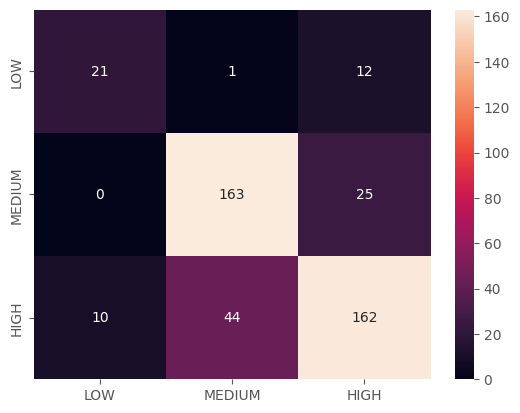

In [45]:
categories = ['LOW','MEDIUM','HIGH']
cm = confusion_matrix(y_test, predictions)
group_counts = [f'{cont}\n' for cont in cm.flatten()]
box_labels = [f'{v1}'.strip() for v1 in group_counts]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])
sb.heatmap(cm, annot=box_labels, fmt='',  xticklabels=categories, yticklabels=categories )
plt.show()

Iteration 1, loss = 31.12988629
Iteration 2, loss = 21.61851293
Iteration 3, loss = 17.53135692
Iteration 4, loss = 17.03020516
Iteration 5, loss = 15.69400318
Iteration 6, loss = 13.51064464
Iteration 7, loss = 13.08942711
Iteration 8, loss = 15.04527431
Iteration 9, loss = 10.18497047
Iteration 10, loss = 10.54068158
Iteration 11, loss = 11.72308180
Iteration 12, loss = 10.27287993
Iteration 13, loss = 8.14402613
Iteration 14, loss = 7.98214024
Iteration 15, loss = 6.56049711
Iteration 16, loss = 5.07956568
Iteration 17, loss = 4.64745562
Iteration 18, loss = 4.00569792
Iteration 19, loss = 3.66765823
Iteration 20, loss = 3.31463265
Iteration 21, loss = 4.19137946
Iteration 22, loss = 4.61184787
Iteration 23, loss = 3.89259512
Iteration 24, loss = 3.56017202
Iteration 25, loss = 4.43853654
Iteration 26, loss = 3.81343513
Iteration 27, loss = 2.79291989
Iteration 28, loss = 2.87379557
Iteration 29, loss = 2.78313390
Iteration 30, loss = 2.30710345
Iteration 31, loss = 2.04302360
Itera

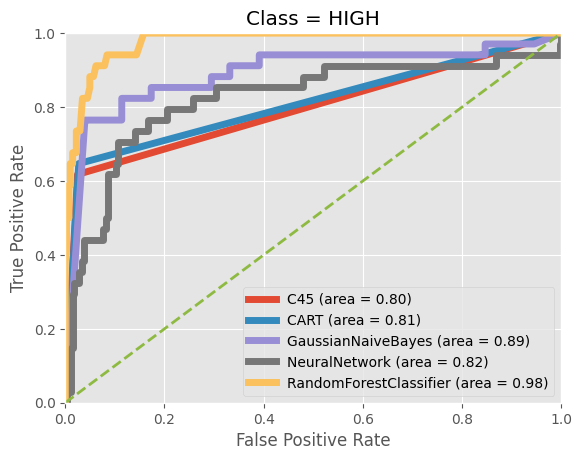

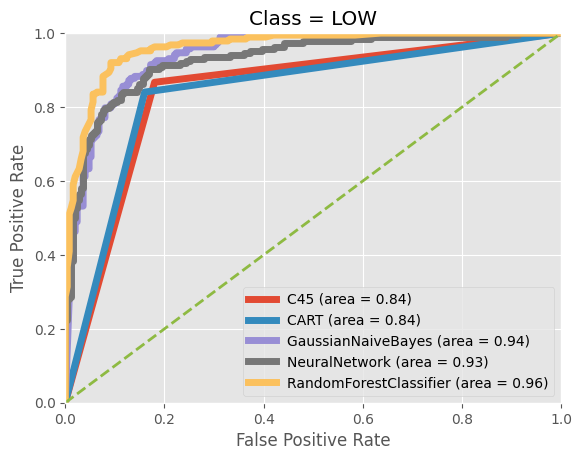

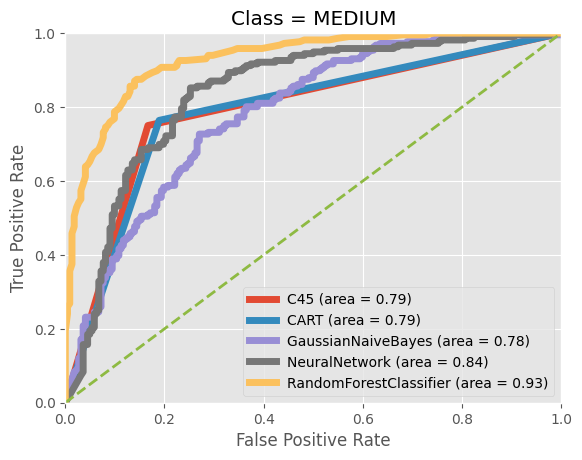

In [46]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

probs = []
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['Drugs']))

for _, model in models:
    model.fit(x_train, y_train)
    probs.append(model.predict_proba(x_test))

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])

        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()